# cs7324 Lab 5 - Wide and Deep Networks

#### Chip Henderson - 48996654 

For this lab I am changing my dataset to the Breast Cancer Gene Expression Profiles (METABRIC) dataset (https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

I wanted a dataset with more feature data for this lab. Additionally, having a history of breast cancer in my family I was curious about the dataset which makes the lab more interesting. I'll be upfront about the fact that my lab is somewhat morbid. I'll be predicting whether a patient is likely to live or die based on the characteristics of their cancer. However, based on a personal family experience, a model like this may have helped drive a more realistic discussion on treatment plan. That aside, thanks to my wife who is an Oncology nurse practicioner and helped me understand some of these terms. 

## 1. Preparation

### Preprocessing and Class Variable Definition

In [455]:
import pandas as pd

bc_df = pd.read_csv(r'c:\users\chip\source\repos\cs7324_code\Lab 5\METABRIC_RNA_Mutation.csv', sep=',')
bc_df.shape

C:\Users\Chip\AppData\Local\Temp\ipykernel_17188\103049857.py:3: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  bc_df = pd.read_csv(r'c:\users\chip\source\repos\cs7324_code\Lab 5\METABRIC_RNA_Mutation.csv', sep=',')


(1904, 693)

In [456]:
# Source: https://stackoverflow.com/questions/34537048/how-to-count-nan-values-in-a-pandas-dataframe
bc_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 693 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    patient_id                      1904 non-null   int64  
 1    age_at_diagnosis                1904 non-null   float64
 2    type_of_breast_surgery          1882 non-null   object 
 3    cancer_type                     1904 non-null   object 
 4    cancer_type_detailed            1889 non-null   object 
 5    cellularity                     1850 non-null   object 
 6    chemotherapy                    1904 non-null   int64  
 7    pam50_+_claudin-low_subtype     1904 non-null   object 
 8    cohort                          1904 non-null   float64
 9    er_status_measured_by_ihc       1874 non-null   object 
 10   er_status                       1904 non-null   object 
 11   neoplasm_histologic_grade       1832 non-null   float64
 12   her2_status_measur

In [457]:
bc_df.head()

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ... mtap_mut  \
0                 claudin-low     1.0                   Positve  ...        0   
1                        LumA     1.0                   Positve  ...        0   
2                        LumB     1.0                   Positve  ...        0   
3                        LumB     1.0                   Positve  ...        0   
4                        LumB     1.0                   Positve  ...        0   

   ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut smarcb1_mut  \
0           0           0        0          0         0         0           0   
1           0           0        0          0         0         0           0   
2           0           0        0          0         0         0           0   
3           0           0        0          0         0         0           0   
4           0           0        0          0         0         0           0   

  stmn2_mut  siah1_mut  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0  

[5 rows x 693 columns]

In [458]:
bc_df.describe()

patient_id  age_at_diagnosis  chemotherapy       cohort  \
count  1904.000000       1904.000000   1904.000000  1904.000000   
mean   3921.982143         61.087054      0.207983     2.643908   
std    2358.478332         12.978711      0.405971     1.228615   
min       0.000000         21.930000      0.000000     1.000000   
25%     896.500000         51.375000      0.000000     1.000000   
50%    4730.500000         61.770000      0.000000     3.000000   
75%    5536.250000         70.592500      0.000000     3.000000   
max    7299.000000         96.290000      1.000000     5.000000   

       neoplasm_histologic_grade  hormone_therapy  \
count                1832.000000      1904.000000   
mean                    2.415939         0.616597   
std                     0.650612         0.486343   
min                     1.000000         0.000000   
25%                     2.000000         0.000000   
50%                     3.000000         1.000000   
75%                     3.000000         1.000000   
max                     3.000000         1.000000   

       lymph_nodes_examined_positive  mutation_count  \
count                    1904.000000     1859.000000   
mean                        2.002101        5.697687   
std                         4.079993        4.058778   
min                         0.000000        1.000000   
25%                         0.000000        3.000000   
50%                         0.000000        5.000000   
75%                         2.000000        7.000000   
max                        45.000000       80.000000   

       nottingham_prognostic_index  overall_survival_months  ...  \
count                  1904.000000              1904.000000  ...   
mean                      4.033019               125.121324  ...   
std                       1.144492                76.334148  ...   
min                       1.000000                 0.000000  ...   
25%                       3.046000                60.825000  ...   
50%                       4.042000               115.616667  ...   
75%                       5.040250               184.716667  ...   
max                       6.360000               355.200000  ...   

             srd5a1        srd5a2        srd5a3           st7         star  \
count  1.904000e+03  1.904000e+03  1.904000e+03  1.904000e+03  1904.000000   
mean   4.726891e-07 -3.676471e-07 -9.453782e-07 -1.050420e-07    -0.000002   
std    1.000263e+00  1.000262e+00  1.000262e+00  1.000263e+00     1.000262   
min   -2.120800e+00 -3.364800e+00 -2.719400e+00 -4.982700e+00    -2.981700   
25%   -6.188500e-01 -6.104750e-01 -6.741750e-01 -6.136750e-01    -0.632900   
50%   -2.456500e-01 -4.690000e-02 -1.422500e-01 -5.175000e-02    -0.026650   
75%    3.306000e-01  5.144500e-01  5.146000e-01  5.787750e-01     0.590350   
max    6.534900e+00  1.027030e+01  6.329000e+00  4.571300e+00    12.742300   

               tnk2         tulp4       ugt2b15      ugt2b17        ugt2b7  
count  1.904000e+03  1.904000e+03  1.904000e+03  1904.000000  1.904000e+03  
mean   3.676471e-07  4.726891e-07  7.878151e-07     0.000000  3.731842e-18  
std    1.000264e+00  1.000262e+00  1.000263e+00     1.000262  1.000262e+00  
min   -3.833300e+00 -3.609300e+00 -1.166900e+00    -2.112600 -1.051600e+00  
25%   -6.664750e-01 -7.102000e-01 -5.058250e-01    -0.476200 -7.260000e-01  
50%    7.000000e-04 -2.980000e-02 -2.885500e-01    -0.133400 -4.248000e-01  
75%    6.429000e-01  5.957250e-01  6.022500e-02     0.270375  4.284000e-01  
max    3.938800e+00  3.833400e+00  1.088490e+01    12.643900  3.284400e+00  

[8 rows x 503 columns]

I'll go ahead and drop na values to help reduce the dataset to more usable data. I'm also dropping the following:
 -  'cancer type' as this entire dataset is breast cancer related and all the values are the same
 -  'cohort' because this is an assigned value and not a measured one that could help prediction
 -  'overall_survival' because this is going to be represented by my classification groups and also would have provided misleading results if the person didn't die of disease

I'm also going to drop the genetic attributes (features 31 through 693) because of the following:
 -  They increase the size significantly
 -  The values aren't easily understandable 
 -  They don't necessarily provide meaningful contribution to the classification objective to non-medical professionals

In [459]:
import copy
# bc_df_full = bc_df.copy() # for use later
bc_df = bc_df.dropna(axis=0)
# bc_df = bc_df.dropna(axis=1)

bc_df = bc_df.drop(bc_df.columns[31:693],axis=1)

features_to_drop = ['cancer_type', 'overall_survival', 'cohort']

bc_df = bc_df.drop(features_to_drop, axis=1)
bc_df.reset_index() # new

# rename column to remove + symbol to avoid any potential datatype issues
bc_df.rename(columns={'pam50_+_claudin-low_subtype':'pam50_plus_claudin-low_subtype'},inplace=True)

bc_df.shape

(1092, 28)

That removed roughly 900 instances of data and a few hundered columns which makes my data far easier to work with. To verify I have no more missing data I'll import missingno to visualize it.

<Axes: >

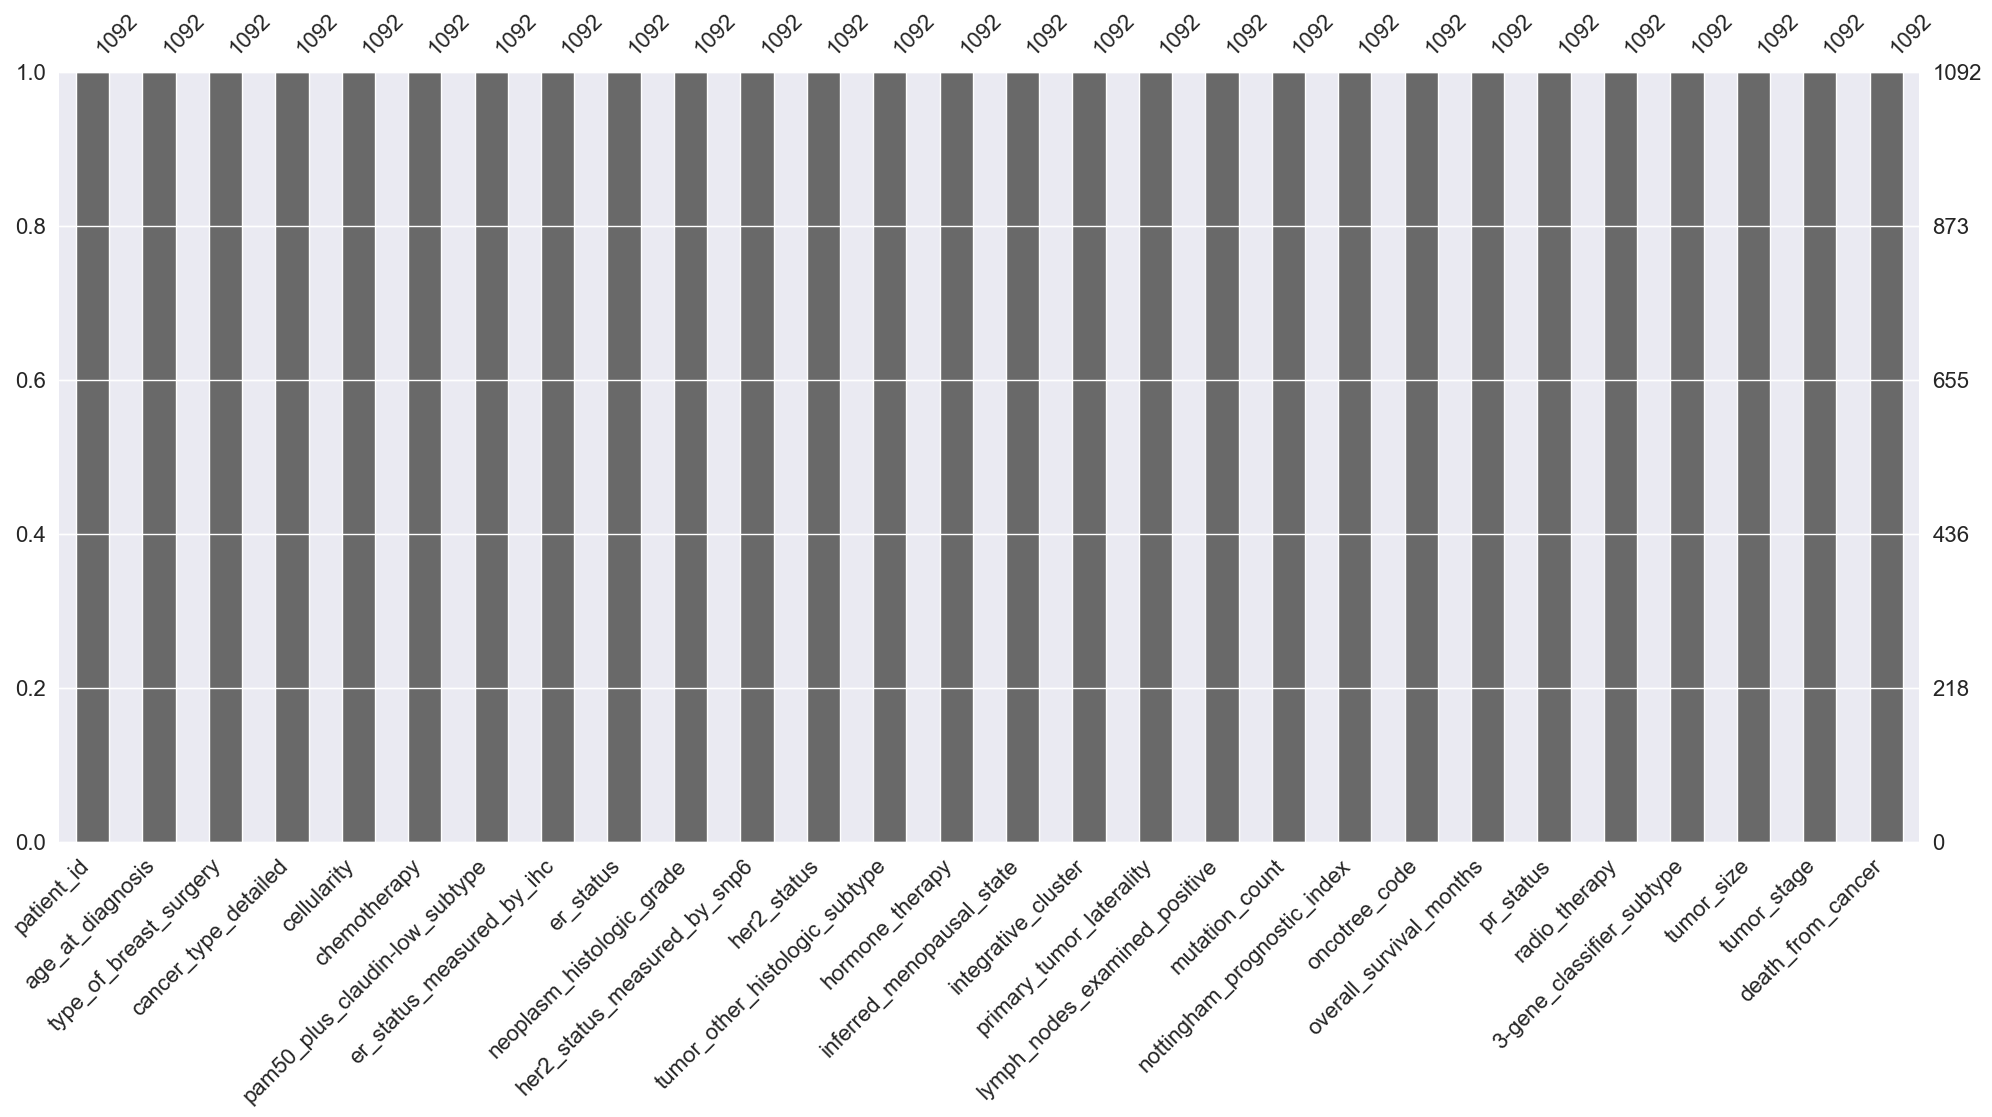

In [460]:
# Referencing code from lecture and in-class examples
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn
# As a departure from lecture code I'm using a bar chart, 
# Matrix version gave me errors regarding 'grid_b' which I wasn't able to resolve
mn.bar(bc_df) 

No more missing data from my features so we're good to proceed.

In [461]:
# Determine the remaining datatpyes I'm working with
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1 to 1664
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1092 non-null   int64  
 1   age_at_diagnosis                1092 non-null   float64
 2   type_of_breast_surgery          1092 non-null   object 
 3   cancer_type_detailed            1092 non-null   object 
 4   cellularity                     1092 non-null   object 
 5   chemotherapy                    1092 non-null   int64  
 6   pam50_plus_claudin-low_subtype  1092 non-null   object 
 7   er_status_measured_by_ihc       1092 non-null   object 
 8   er_status                       1092 non-null   object 
 9   neoplasm_histologic_grade       1092 non-null   float64
 10  her2_status_measured_by_snp6    1092 non-null   object 
 11  her2_status                     1092 non-null   object 
 12  tumor_other_histologic_subtype  1092 no

For my classification objective I want to know what the possible outcomes are

In [462]:
unique_survivability = list(enumerate(bc_df.death_from_cancer.unique()))

print(unique_survivability)


[(0, 'Living'), (1, 'Died of Disease'), (2, 'Died of Other Causes')]


Died of other causes may not be of value to me because if they didn't either survive or succumb to the disease the data won't provide accurate prediction. Another way to say 'Died of Other Causes' may be that they survived the disease. But, since we don't know how they died, cancer may have ended up being the cause of death given a long enough life span.

I'll start by seeing how many values are in this category then deciding what to do with it.

In [463]:
survivability_list = [x for x in bc_df['death_from_cancer'] if x == 'Died of Other Causes']

print(f'There are {len(survivability_list)} deaths related to other causes out of {bc_df.shape[0]} instances')

There are 238 deaths related to other causes out of 1092 instances


I'm going to drop these values even though it'll put my number of instances under 1k, smaller than desired. I'll review the class balances later and determine whether I should add some additional samples via oversampling.

In [464]:
bool_of_unrelated_deaths = (bc_df['death_from_cancer'] == 'Died of Other Causes')
idx_matching = bc_df[bool_of_unrelated_deaths].index
bc_df = bc_df.drop(idx_matching,axis=0)
print(bc_df.shape)

(854, 28)


I'd like to understand how well balanced by two classification groups are, as that will impact how well my model may perform. So I'll check that next.

<Axes: title={'center': 'Quantity of Each Outcome'}, ylabel='patient_id'>

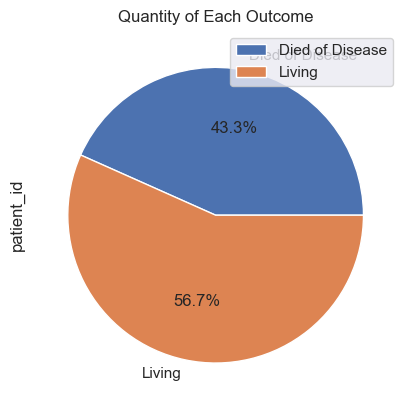

In [465]:
import matplotlib
import matplotlib.pyplot as plt

outcomes = bc_df.groupby(['death_from_cancer'])
outcomes.count().plot(kind='pie', 
                      y='patient_id', 
                      autopct='%1.1f%%', 
                      title = "Quantity of Each Outcome")

The pie chart is a simple and visually effective way to represent the balance in my two classes. The balance is fairly close but I'd like to have them as even as possible. So I'm going to oversample by repeating several values from 1 (died_of_cancer). This is an appropriate technique because what I'm wanting my model to learn are the characteristics of the cancer that make it more lethal, thereby providing more confirmational guidance for care providers to have open and candid conversation with their patients. If I were to simply recreate instances or impute and alter the result to balance the classes, this would be an inappropriate technique to balance. 

There are 854 entries total, so if I want to have each value be equal the number of instances where the individual died needs to be increased by (.567-.433)*854 = ~114 instances.

In [466]:
# Add instances to balance the classes
bool_of_related_deaths = (bc_df['death_from_cancer'] == 'Died of Disease')
idx_matching_1 = bc_df[bool_of_related_deaths].index
bc_df_died = bc_df.loc[idx_matching_1]
bc_df_died = bc_df_died[:114] # only need a few


bc_df = pd.concat([bc_df, bc_df_died], ignore_index=True)

print(bc_df.shape)


(968, 28)


<Axes: title={'center': 'Quantity of Each Outcome After Oversampling'}, ylabel='patient_id'>

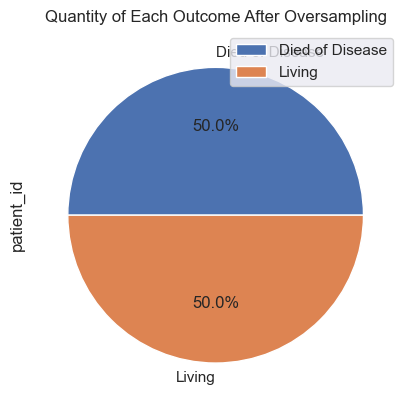

In [467]:
# Take another look at our pie chart to verify the classes are balanced.
outcomes = bc_df.groupby(['death_from_cancer'])
outcomes.count().plot(kind='pie', 
                      y='patient_id', 
                      autopct='%1.1f%%',
                      title="Quantity of Each Outcome After Oversampling")

Now that my outcomes are balanced I'm going to drop patient ID before moving on. This is because it is an assigned value with no use in prediction. I can use the instance index values if needed to refer to a particular instance. Also, I'll move the feature I intend to predict to be the last one in the dataframe as more of a data visualization intent than anything else.

In [468]:
# Drop patient id
bc_df = bc_df.drop('patient_id', axis=1) 

# Move column 'death_from_cancer' to the end
bc_df = bc_df[[col for col in bc_df.columns if col != 'death_from_cancer'] + ['death_from_cancer']]

bc_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_diagnosis                968 non-null    float64
 1   type_of_breast_surgery          968 non-null    object 
 2   cancer_type_detailed            968 non-null    object 
 3   cellularity                     968 non-null    object 
 4   chemotherapy                    968 non-null    int64  
 5   pam50_plus_claudin-low_subtype  968 non-null    object 
 6   er_status_measured_by_ihc       968 non-null    object 
 7   er_status                       968 non-null    object 
 8   neoplasm_histologic_grade       968 non-null    float64
 9   her2_status_measured_by_snp6    968 non-null    object 
 10  her2_status                     968 non-null    object 
 11  tumor_other_histologic_subtype  968 non-null    object 
 12  hormone_therapy                 968 

#### Final Dataset Description

This final dataset is comprised of 968 breast cancer patients with 27 features related to their case. At this point, the data has not been either one-hot encoded or label-encoded. I'll do that as part of my FeatureSpace setup. The target data is an object datatype containing the outcome of whether or not the patient lived, making this model a binary classifier.

The outcome (target) values datasets are balanced with half of the instances relating to patients that lived, and half the instances relating to patients that died of the disease. I've removed any instances with missing values from the dataset and I have removed gene specific z-values which comprised a great deal of the original features but were not value-added for my purposes. The data is not yet scaled.

### Cross-Product Feature Identification

To start, I'm interested in how many unique values I have in each feature:

In [469]:
# Source: for dictionary sorting https://stackoverflow.com/questions/64885734/how-to-sort-a-dictionary-in-descending-order-according-its-value
# unique_feature_count = [feature for feature in bc_df.columns if feature != 'death_from_cancer']
unique_feature_count = [feature for feature in bc_df.columns if bc_df[feature].dtype == object]
unique_dict = {}
for feature in unique_feature_count:
    unique_vals = len(list(enumerate(bc_df[feature].unique())))
    unique_dict[feature] = unique_vals

unique_dict_sorted = sorted(unique_dict.items(), key=lambda x:x[1], reverse=True)
for item in unique_dict_sorted:
    print(f'There are {item[1]} unique values in {item[0]}')


There are 11 unique values in integrative_cluster
There are 7 unique values in pam50_plus_claudin-low_subtype
There are 7 unique values in tumor_other_histologic_subtype
There are 5 unique values in cancer_type_detailed
There are 5 unique values in oncotree_code
There are 4 unique values in her2_status_measured_by_snp6
There are 4 unique values in 3-gene_classifier_subtype
There are 3 unique values in cellularity
There are 2 unique values in type_of_breast_surgery
There are 2 unique values in er_status_measured_by_ihc
There are 2 unique values in er_status
There are 2 unique values in her2_status
There are 2 unique values in inferred_menopausal_state
There are 2 unique values in primary_tumor_laterality
There are 2 unique values in pr_status
There are 2 unique values in death_from_cancer


To determine which features to cross I'd like to understand which ones are correlated to eachother. To do that, I need to one hot encode some of my values. Because I'm going to encode later, I'll make this as a separate dataframe.

In [470]:
# One-hot encode other object values
# I'll write a loop for this since there are several

import copy
bc_df_encoded = bc_df.copy()
# limit to categorical features
features_to_encode = [label for label in bc_df_encoded.columns if bc_df_encoded.dtypes[label] == object]

# print(features_to_encode) # debug

for feature in features_to_encode:
    tmp_df = pd.get_dummies(bc_df[feature],prefix=feature)
    bc_df_encoded = pd.concat((bc_df_encoded,tmp_df),axis=1)
    bc_df_encoded = bc_df_encoded.drop(feature, axis=1) # drop original column

In [471]:
# Let's pull some basic correlation data to see if that will help identify features to cross product
# Check correlation of each feature to 'death_from_cancer' first
features_to_correlate = [feature for feature in bc_df_encoded.columns 
                         if feature != 'death_from_cancer' 
                         and bc_df_encoded[feature].dtype == bool]

corr_to_outcome = [bc_df_encoded[feature].corr(bc_df_encoded['death_from_cancer_Died of Disease']) 
                   for feature in features_to_correlate] 
vars_to_use = []
for feature, value in zip(features_to_correlate, corr_to_outcome):
        if value >= 0.1: # Limit just to values 0.2
                print(f'The correlation of ', feature, ' to outcome is ', round(value,3))
                vars_to_use.append(feature)

The correlation of  type_of_breast_surgery_MASTECTOMY  to outcome is  0.201
The correlation of  pam50_plus_claudin-low_subtype_Her2  to outcome is  0.138
The correlation of  pam50_plus_claudin-low_subtype_LumB  to outcome is  0.118
The correlation of  her2_status_measured_by_snp6_GAIN  to outcome is  0.106
The correlation of  her2_status_Positive  to outcome is  0.137
The correlation of  inferred_menopausal_state_Post  to outcome is  0.1
The correlation of  integrative_cluster_5  to outcome is  0.159
The correlation of  pr_status_Negative  to outcome is  0.11
The correlation of  3-gene_classifier_subtype_ER+/HER2- High Prolif  to outcome is  0.14
The correlation of  3-gene_classifier_subtype_HER2+  to outcome is  0.12
The correlation of  death_from_cancer_Died of Disease  to outcome is  1.0


No single feature appears to be significantly correlated with my target values. However it would also be useful to understand how some of these features correlate to one-another. I'll put together a heatmap of some of these values to visualize that.

<Axes: >

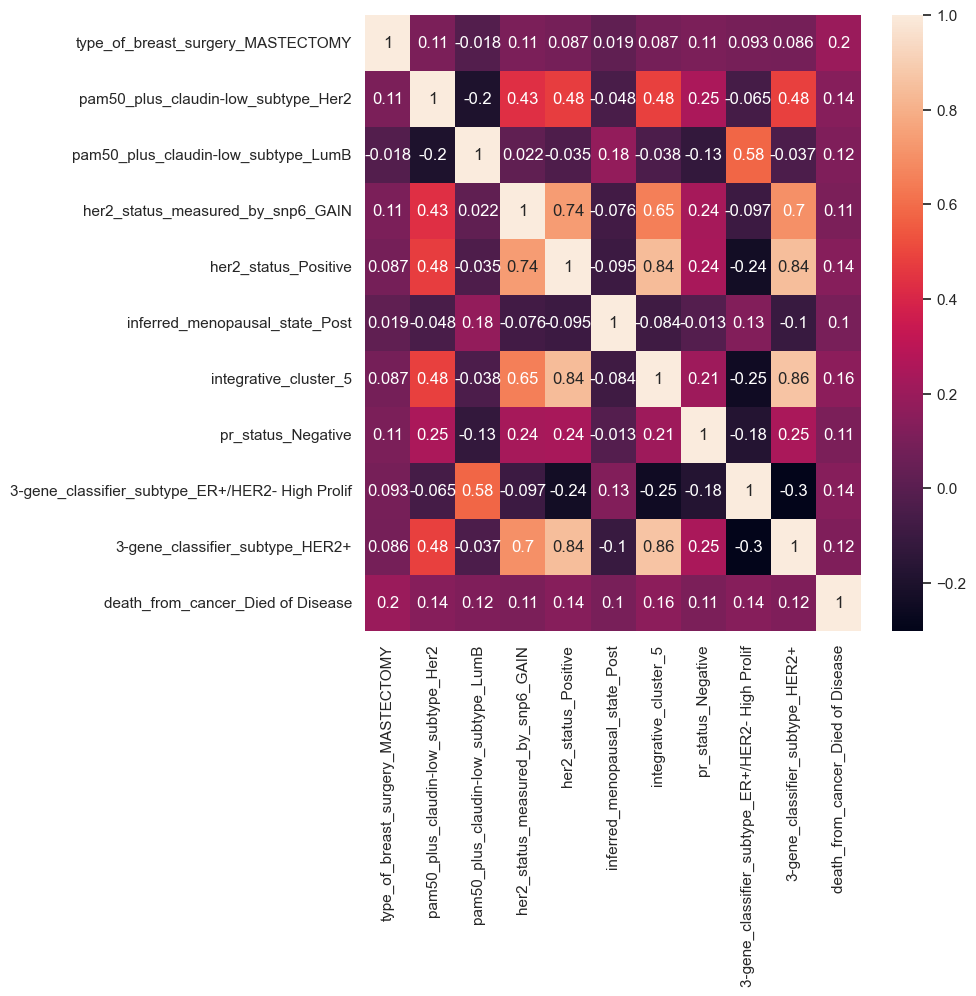

In [472]:
# Source: modified from lab_1 in-class lectures
import seaborn as sns

# plot the correlation matrix using a subset of features

cmap = sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(bc_df_encoded[vars_to_use].corr(), cmap=cmap, annot=True)

Generally, I'm going to pick things that can be thought of as rules. As such, I'm looking for things that are related or appear to move as though they are related. Therefore I'm using correlation as a guiding principle. Second, I'll look for features that seem like they would interract. 

Therefore, I'm going to cross the following:
 -  her2_status_measured_by_snp6 and her2_status. These two items are related in that both are used to classify the cancer subtype (Source: mayoclinic.org)
 -  3-gene_classifier_subtype and integrative_cluster. "Integrative_clustering is a breast cancer classification of 10 different subgroups with distinctive molecular profiles and clininclal outcomes" (source: https://ascopubs.org/doi/abs/10.1200/JCO.2018.36.15_suppl.579)
 -  3-gene_classifier, integrative_cluster, pam50_plus is another option to consider as all are forms of classification and should move together
 -  er_status and er_status_measured_by_ihc should also move together though I didn't put them in my correlation heatmap
 -  Another experiment to try would be to see if I can map chemotherapy, radio_therapy, and hormone_therapy to true/false instead of 0/1 because then I could cross the features (I tried to cross these as integer values which I quikcly learned you can't do)


### Metric Selection and Reasoning

**For this model I'll be using F-measure for assessing performance**

The model will be designed as a binary classifier of the probable outcome of breast cancer based on the inputs. So the metrics of primary interest are true positives (the patient will likely die due to disesase), and false negatives (the patient died of disesase but it wasn't predicted). 

I'll take a moment to discuss false positives as their impact can be viewed differently depending on perspective. A false positive for this model would be a prediction that the patient would die from disease but ends up being incorrect. This presents an obviously difficult situation for the patient due to the psychological impact of such a diagnosis. The counterbalance of this however, is that the patients outcome is much better. Despite this potential upside, the patient may make life altering decisions based on a diagnosis this model provides. Therefore I have to treat false positives with almost equal importance as true positives and false negatives.

To choose a metric that meets these requirements, I need to assess the measurements used in calculating the metrics. I would like to select a metric that emphasizes:
 -  True Positives
 -  False Negatives
 -  False Positives

Precision Uses False Positives and False Positives. It does not weigh false negatives. Since I believe false negatives will be important to my model's performance, this is not a viable option. Recall Uses True Positives and False Negatives. Again it addresses two of my areas of interest but not all three as False Positives are missing.

**F-Measure** combines precision and recall with equal balances between the two. This is an ideal measure to use for my purposes as it addresses the three areas of interest with equal weightings. I'll plan on using F-measure in assessing my model's performance. 

Another option to consider would be using F_beta which allows me to decrease the impact of Recall on the calculation. However, knowing that recall uses True Positives and False Negatives which are both of high importance to me, I don't want to decrement the weighting of that particular metric in this circumstance.

### Methods for Dividing and Testing the Data

**For this model I'll be using K-fold for Test/Train Split**

To assess which method for my testing and training data is best I need to understand some basic information about how I've set up my data. I purposefully oversampled my data for this lab such that the results of my binary output are an even 50/50 split. Additionally, having 968 instances and 27 features, the size of the dataset is in the small to medium range. 

The options I have for selecting how to split my testing and trainig data include holdout, random subsampling, and KFold or Stratified KFold. Because my dataset is of the small to medium size range, holdout and random subsampling are likely not required. Random subsampling would be more applicable in a very large datset which makes training a model on all the data an inefficient process. Holdout is a viable option, however KFold provides a more thorough understanding of how my model is performing on the data. 

K-fold will help ensure I have an evenly divided test data-set, and any trends that might appear in the data are mitigated. I'll also be using shuffle to further address this. Stratified K-fold would be appropriate if my dataset was unbalanced in its results. Even without oversampling I show above, this dataset was relatively even. Therefore I should be fine using K-fold without employing the stratified technique. If I want to have an alternative option I will consider using holdout as that is the next most viable selection.

In [473]:
# Setup my feature labels with appropriate variables needed later
import numpy as np

# create a tensorflow dataset, for ease of use later
batch_size = 44 # 44 divides evenly into my total instances, 968

# Map the classification groups to integers
# This could have been done in FeatureSpace, but doing here as a matter of preference
survivability_dict = {'Living':0, 'Died of Disease':1}
bc_df['death_from_cancer'] = bc_df['death_from_cancer'].map(survivability_dict)

categorical_headers = [label for label in bc_df.columns if bc_df.dtypes[label] == object]
int_headers = ['chemotherapy','radio_therapy','hormone_therapy']
numeric_headers = [label for label in bc_df.columns if bc_df.dtypes[label] == float] + int_headers

In [474]:
# Perform the test/train split of the data
# Source: https://stackoverflow.com/questions/45115964/separate-pandas-dataframe-using-sklearns-kfold
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# Source: https://machinelearningmastery.com/k-fold-cross-validation/
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, shuffle=True, random_state=1) # 6 splits resulted in ~80/20 split
result = next(kf.split(bc_df), None) # returns indices of test/train instances

bc_df_train = bc_df.iloc[result[0]]
bc_df_test =  bc_df.iloc[result[1]]

print(bc_df_train.shape)
print(bc_df_test.shape)


(806, 27)
(162, 27)


## 2. Modeling

As previously mentioned, I'm going to be setting up all of my models using FeatureSpaces. This will give me an easy way to re-use configurations as necessary. I'm going to be creating 3 models in this first section, all of which are deep and wide representations.

In [475]:
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [476]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import FeatureSpace

In [477]:
# Adding a function to create a tensorflow dataset from dataframe
# Source: modified from in class lecture/notebook to align with my dataset

def create_dataset_from_dataframe(df_input):

    df = df_input.copy()
    labels = df['death_from_cancer']

    df = {key: value.values[:,np.newaxis] for key, value in df_input[categorical_headers+numeric_headers].items()}
    # print(df) # debug
    # create the Dataset here
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    
    # now enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    
    return ds

ds_train = create_dataset_from_dataframe(bc_df_train)
ds_test = create_dataset_from_dataframe(bc_df_test)

In [478]:
# Adding a function to create embeddings from the tensors
# Source: modified from in class lecture/notebook to align with my dataset
from tensorflow.keras.layers import Embedding, Flatten

def setup_embedding_from_categorical(feature_space, col_name):
    # what the maximum integer value for this variable?
    # which is the same as the number of categories
    N = len(feature_space.preprocessors[col_name].get_vocabulary())
    
    # get the output from the feature space, which is input to embedding
    x = feature_space.preprocessors[col_name].output
    
    # now use an embedding to deal with integers from feature space
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x # return the tensor here 

In [479]:
#Source: Modified from in-class lecture
def setup_embedding_from_crossing(feature_space, col_name):
    # what the maximum integer value for this variable?
    
    # get the size of the feature
    N = feature_space.crossers[col_name].num_bins
    x = feature_space.crossers[col_name].output
    
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x

In [480]:
# Source: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# Setup functions to allow for F1 calculation
# Note I found this functionality to be depricated in my version of Keras, so it required a manual implementation
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Now I can setup my models for Keras.

### Model 1 of 3

I'll start all of my models by either setting up or re-using a FeatureSpace.

In [481]:
# Source: Modified from in-class lecture to match my dataset
from tensorflow.keras.utils import FeatureSpace

feature_space_1 = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "type_of_breast_surgery": FeatureSpace.string_categorical(num_oov_indices=0),
        "cancer_type_detailed": FeatureSpace.string_categorical(num_oov_indices=0),
        "cellularity": FeatureSpace.string_categorical(num_oov_indices=0),
        "pam50_plus_claudin-low_subtype": FeatureSpace.string_categorical(num_oov_indices=0),
        "er_status_measured_by_ihc": FeatureSpace.string_categorical(num_oov_indices=0),
        "er_status": FeatureSpace.string_categorical(num_oov_indices=0),
        "her2_status_measured_by_snp6": FeatureSpace.string_categorical(num_oov_indices=0),
        "her2_status": FeatureSpace.string_categorical(num_oov_indices=0),
        "tumor_other_histologic_subtype": FeatureSpace.string_categorical(num_oov_indices=0),
        # "tumor_other_histologic_subtype": FeatureSpace.string_categorical(num_oov_indices=0),
        "inferred_menopausal_state": FeatureSpace.string_categorical(num_oov_indices=0),
        "integrative_cluster": FeatureSpace.string_categorical(num_oov_indices=0),
        "primary_tumor_laterality": FeatureSpace.string_categorical(num_oov_indices=0),
        "oncotree_code": FeatureSpace.string_categorical(num_oov_indices=0),
        "pr_status": FeatureSpace.string_categorical(num_oov_indices=0),
        "3-gene_classifier_subtype": FeatureSpace.string_categorical(num_oov_indices=0),
        # "chemotherapy": FeatureSpace.string_categorical(num_oov_indices=0),
        # "hormone_therapy": FeatureSpace.string_categorical(num_oov_indices=0),
        # "radio_therapy": FeatureSpace.string_categorical(num_oov_indices=0),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert
        "chemotherapy": FeatureSpace.float_normalized(),
        "hormone_therapy": FeatureSpace.float_normalized(),
        "radio_therapy": FeatureSpace.float_normalized(),
        "age_at_diagnosis": FeatureSpace.float_normalized(),
        "neoplasm_histologic_grade": FeatureSpace.float_normalized(),
        "lymph_nodes_examined_positive": FeatureSpace.float_normalized(),
        "mutation_count": FeatureSpace.float_normalized(),
        "nottingham_prognostic_index": FeatureSpace.float_normalized(),
        "overall_survival_months": FeatureSpace.float_normalized(),
        "tumor_size": FeatureSpace.float_normalized(),
        "tumor_stage": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(
            feature_names=('her2_status_measured_by_snp6','her2_status'),
            crossing_dim=4*2),
        FeatureSpace.cross(
            feature_names=('3-gene_classifier_subtype', 'integrative_cluster'),
            crossing_dim=4*11),
        FeatureSpace.cross(
            feature_names=('er_status', 'er_status_measured_by_ihc'),
            crossing_dim=2*2),    
        ],
    output_mode="concat", 
)


# now that we have specified the preprocessing, let's run it on the data

# create a version of the dataset that can be iterated without labels
train_ds_with_no_labels = ds_train.map(lambda x, _: x)  
feature_space_1.adapt(train_ds_with_no_labels) # inititalize the feature map to this data
# the adapt function allows the model to learn one-hot encoding sizes

# I won't be using the pre-processed portion in my models, but I'll need it later
# now define a preprocessing operation that returns the processed features
preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space_1(x), y), 
                                     num_parallel_calls=tf.data.AUTOTUNE)
# run it so that we can use the pre-processed data
preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

# do the same for the test set
preprocessed_ds_test = ds_test.map(lambda x, y: (feature_space_1(x), y), num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)

Model: "model_35"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 type_of_breast_surgery (InputL  [(None, 1)]         0           []                               
 ayer)                                                                                            
                                                                                                  
 cancer_type_detailed (InputLay  [(None, 1)]         0           []                               
 er)                                                                                              
                                                                                                  
 cellularity (InputLayer)       [(None, 1)]          0           []                               
                                                                                           

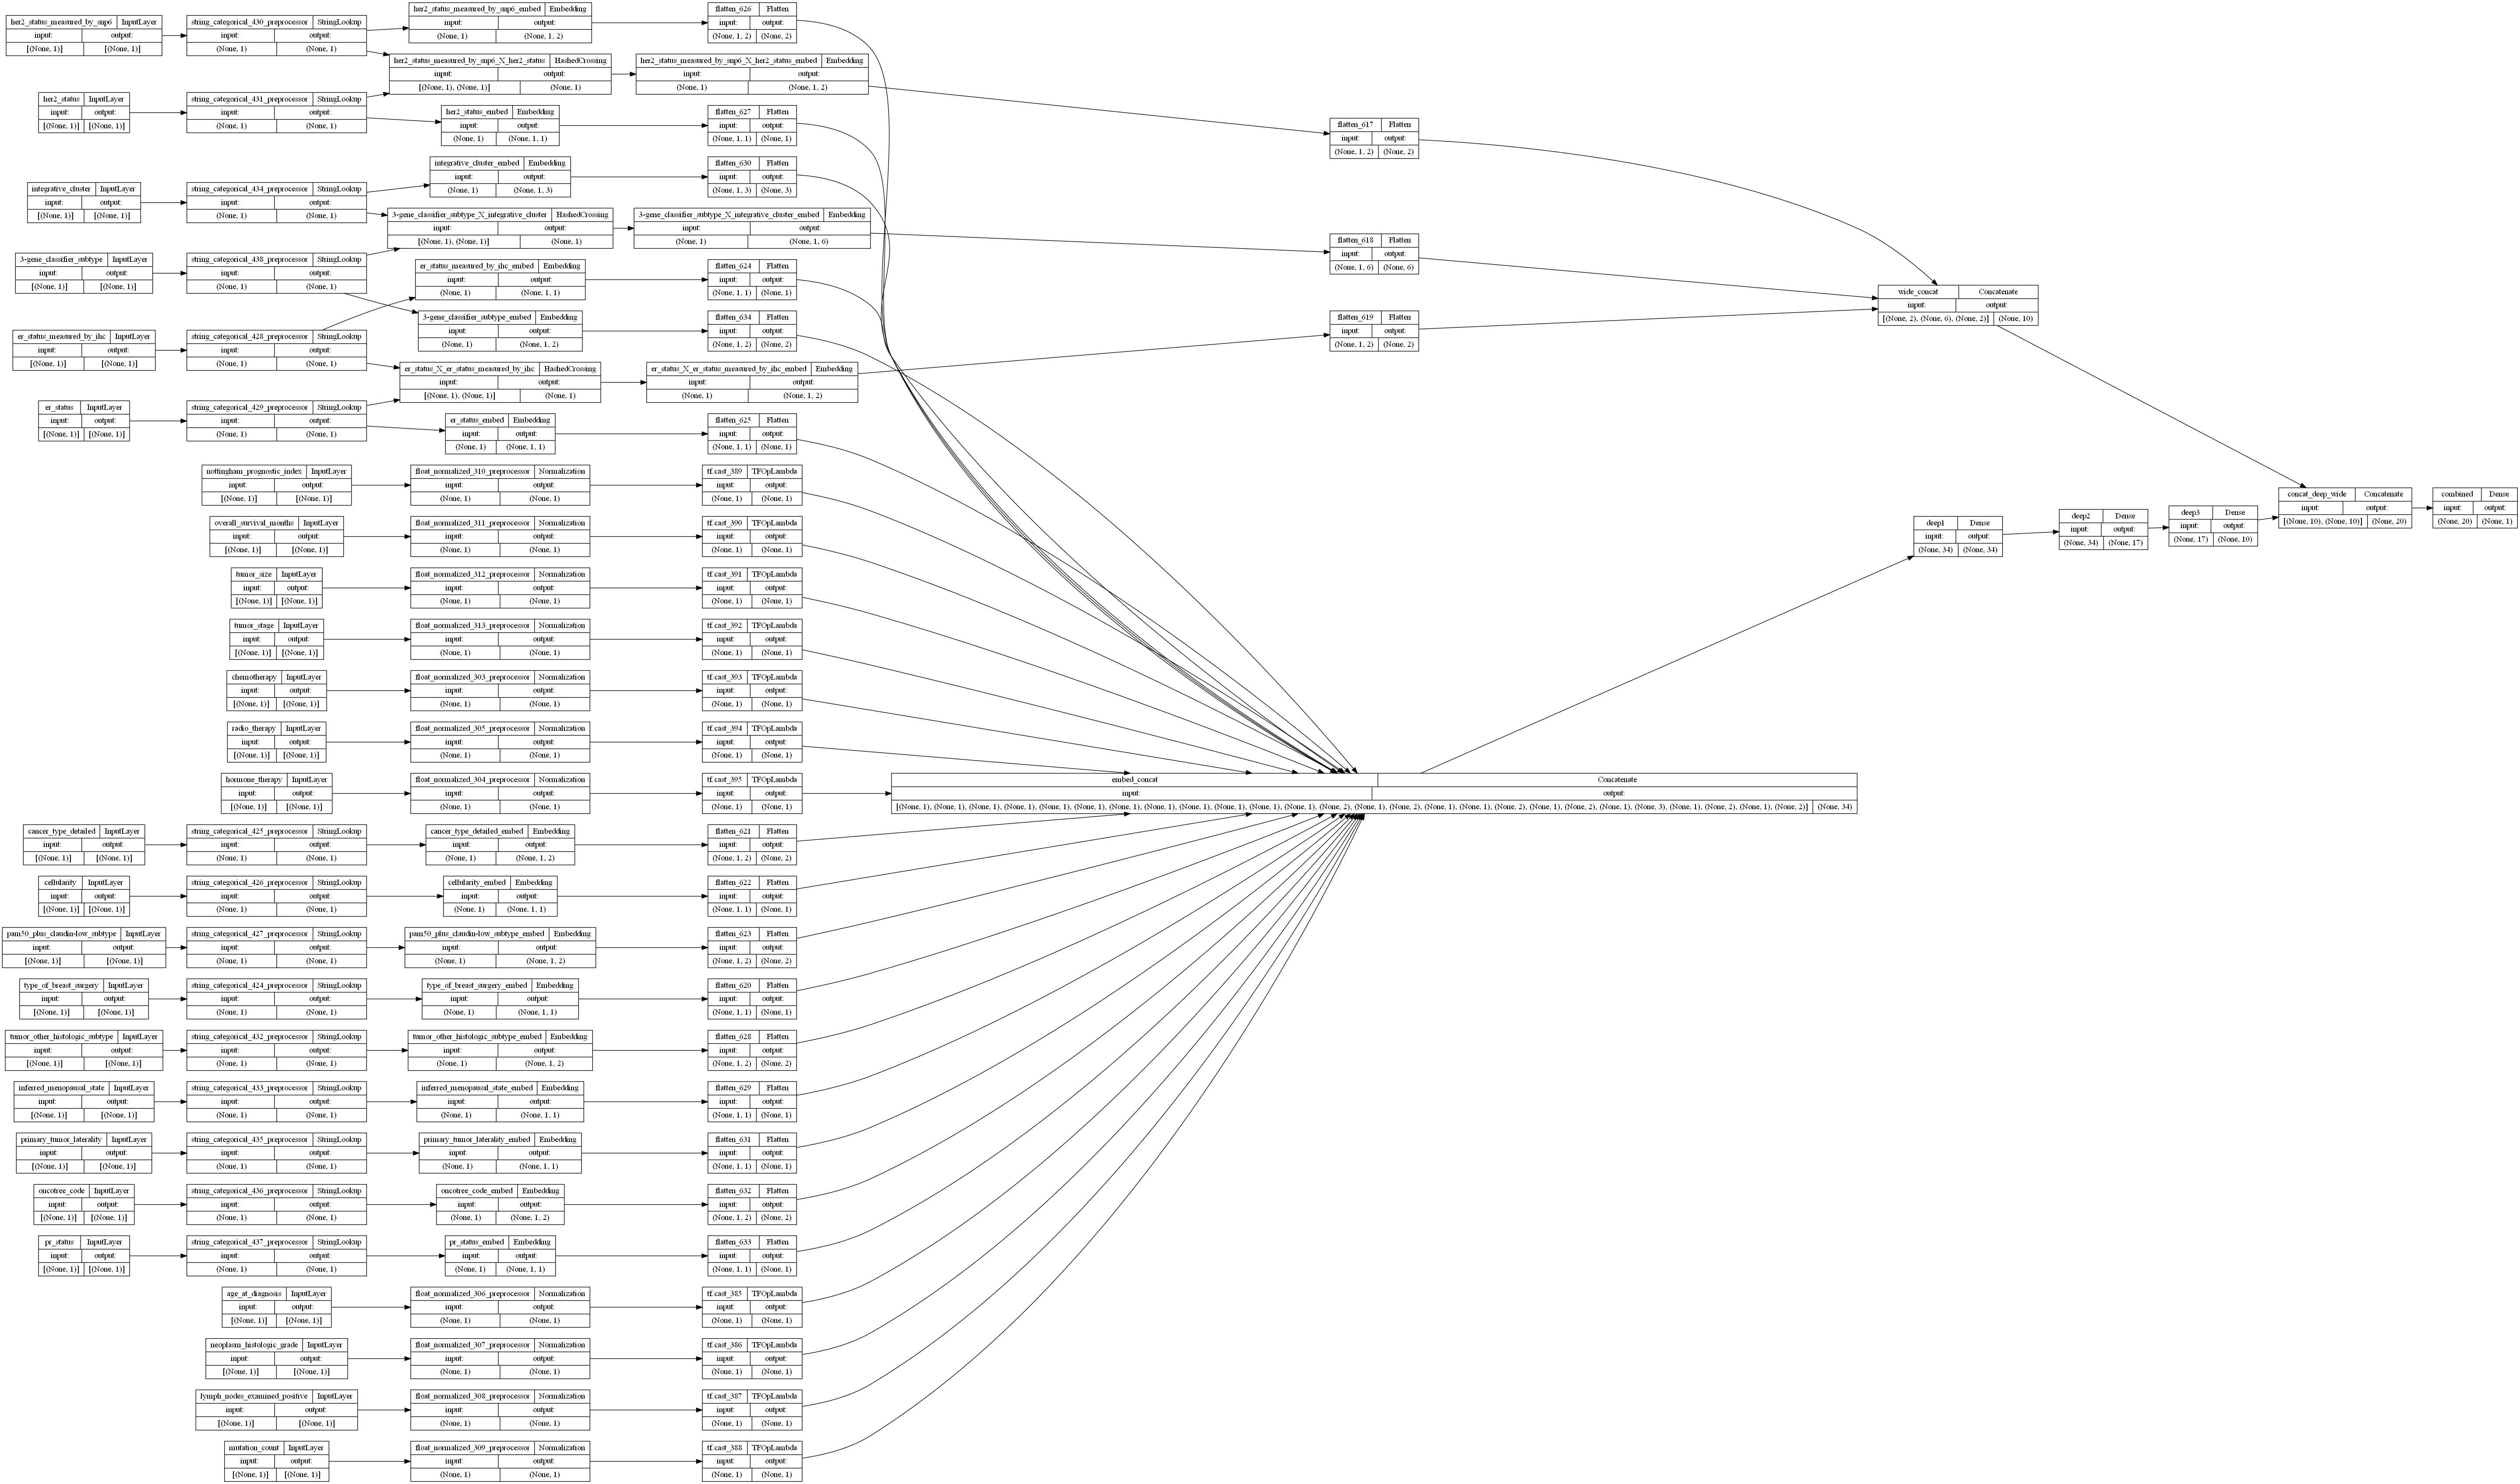

In [482]:
# Source: Modified from in-class lecture to match my dataset
dict_inputs = feature_space_1.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space_1.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space_1, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space_1.preprocessors[col].output
    x = tf.cast(x,float) # cast an integer as a float here
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space_1, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=34,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=17,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

training_model_1 = keras.Model(inputs=dict_inputs, outputs=final_branch)

# Source: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
training_model_1.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=['acc',f1_m,precision_m, recall_m]
)

training_model_1.summary()

plot_model(
    training_model_1, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


In [483]:
# Train the model
history_1 = training_model_1.fit(
    ds_train, epochs=25, validation_data=ds_test, verbose=2
)

Epoch 1/25


19/19 - 4s - loss: 0.6937 - acc: 0.5211 - f1_m: 0.1378 - precision_m: 0.5921 - recall_m: 0.0799 - val_loss: 0.6872 - val_acc: 0.5247 - val_f1_m: 0.2440 - val_precision_m: 0.6726 - val_recall_m: 0.1592 - 4s/epoch - 236ms/step
Epoch 2/25
19/19 - 0s - loss: 0.6610 - acc: 0.6563 - f1_m: 0.4916 - precision_m: 0.8188 - recall_m: 0.3629 - val_loss: 0.6650 - val_acc: 0.6481 - val_f1_m: 0.5436 - val_precision_m: 0.7738 - val_recall_m: 0.4575 - 73ms/epoch - 4ms/step
Epoch 3/25
19/19 - 0s - loss: 0.6370 - acc: 0.7072 - f1_m: 0.6399 - precision_m: 0.7814 - recall_m: 0.5686 - val_loss: 0.6426 - val_acc: 0.6914 - val_f1_m: 0.6419 - val_precision_m: 0.7453 - val_recall_m: 0.5908 - 71ms/epoch - 4ms/step
Epoch 4/25
19/19 - 0s - loss: 0.6084 - acc: 0.7233 - f1_m: 0.6792 - precision_m: 0.7612 - recall_m: 0.6501 - val_loss: 0.6136 - val_acc: 0.7099 - val_f1_m: 0.6848 - val_precision_m: 0.7398 - val_recall_m: 0.6750 - 74ms/epoch - 4ms/step
Epoch 5/25
19/19 - 0s - loss: 0.5751 - acc: 0.7531 - f1_m: 0.7241 -

Text(0.5, 0, 'epochs')

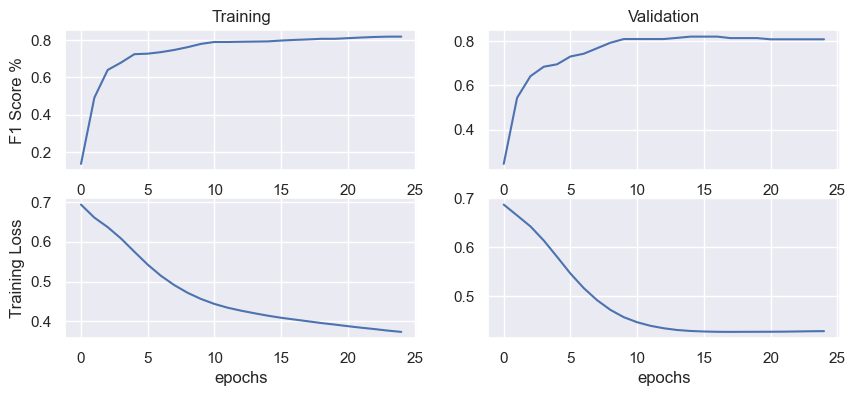

In [484]:
# Print plots of metrics
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history_1.history['f1_m'])

plt.ylabel('F1 Score %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history_1.history['val_f1_m'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history_1.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history_1.history['val_loss'])
plt.xlabel('epochs')

I see convergence in this model at around 20-25 epochs. F1 score is good on validation and training data as well. Ideally I'd like to see my training loss get lower than this as I want it to be as low as possible. Next I'll check the confusion matrix to see my ratio of True Positives, True Negatives, False Positives, and False Negatives.

4/4 [==============================] - 1s 3ms/step
[[66 14]
 [16 66]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        80
           1       0.82      0.80      0.81        82

    accuracy                           0.81       162
   macro avg       0.81      0.81      0.81       162
weighted avg       0.82      0.81      0.81       162



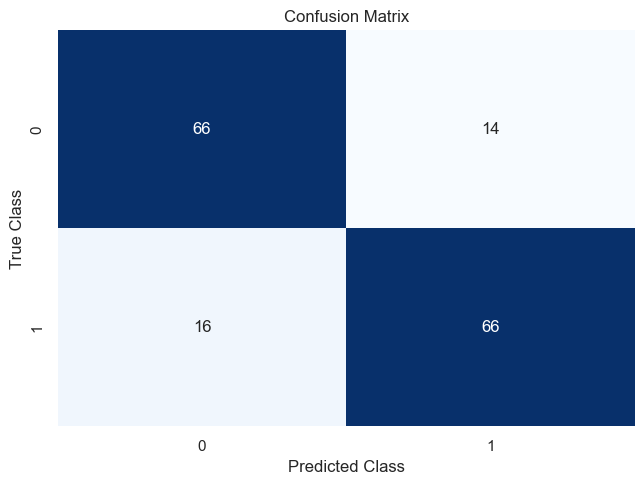

In [485]:
#  Vizualize some metrics associated with this model

# Source: Modified from in-class lecture
# Use the sklearn metrics here, if you want to
from sklearn import metrics as mt

y_test = tf.concat([y for x, y in ds_test], axis=0)
y_test = y_test.numpy()

# now lets see how well the model performed
yhat_proba_1 = training_model_1.predict(ds_test) # sigmoid output probabilities
# use squeeze to get rid of any extra dimensions 
yhat_1 = np.round(yhat_proba_1.squeeze()) # round to get binary class

conf_mat_1 = mt.confusion_matrix(y_test, yhat_1)

print(conf_mat_1)
print(mt.classification_report(y_test,yhat_1))

# Source: Albon, Chris. Machine Learning with Python Cookbook. O'Reilly Media, 20180309.  VitalBook file.
# Create pandas dataframe
conf_df_1 = pd.DataFrame(conf_mat_1, index=bc_df.death_from_cancer.unique(), columns=bc_df.death_from_cancer.unique())

# Create heatmap
sns.heatmap(conf_df_1, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Not a bad result. My True Positives and True Negatives are relatively high compared with False Positives and False Negatives. However I'd really like to see fewer false positives. As I stated above they can be bad for patient well-being due to the decisions they may drive. We'll see if we can improve on this in subsequent models.

### Model 2 of 3

This model changes some of the cross features to see if it impacts results. In model 2, I'm going to see if I can try some of the other feature space arrangements discussed above. So I'll use the following:

 -  her2_status_measured_by_snp6 and her2_status (old)
 -  3-gene_classifier, integrative_cluster, pam50_plus (new)
 -  er_status and er_status_measured_by_ihc (old)


In [486]:
# Source: Modified from in-class lecture to match my dataset
from tensorflow.keras.utils import FeatureSpace

feature_space_2 = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "type_of_breast_surgery": FeatureSpace.string_categorical(num_oov_indices=0),
        "cancer_type_detailed": FeatureSpace.string_categorical(num_oov_indices=0),
        "cellularity": FeatureSpace.string_categorical(num_oov_indices=0),
        "pam50_plus_claudin-low_subtype": FeatureSpace.string_categorical(num_oov_indices=0),
        "er_status_measured_by_ihc": FeatureSpace.string_categorical(num_oov_indices=0),
        "er_status": FeatureSpace.string_categorical(num_oov_indices=0),
        "her2_status_measured_by_snp6": FeatureSpace.string_categorical(num_oov_indices=0),
        "her2_status": FeatureSpace.string_categorical(num_oov_indices=0),
        "tumor_other_histologic_subtype": FeatureSpace.string_categorical(num_oov_indices=0),
        # "tumor_other_histologic_subtype": FeatureSpace.string_categorical(num_oov_indices=0),
        "inferred_menopausal_state": FeatureSpace.string_categorical(num_oov_indices=0),
        "integrative_cluster": FeatureSpace.string_categorical(num_oov_indices=0),
        "primary_tumor_laterality": FeatureSpace.string_categorical(num_oov_indices=0),
        "oncotree_code": FeatureSpace.string_categorical(num_oov_indices=0),
        "pr_status": FeatureSpace.string_categorical(num_oov_indices=0),
        "3-gene_classifier_subtype": FeatureSpace.string_categorical(num_oov_indices=0),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert
        "chemotherapy": FeatureSpace.float_normalized(),
        "hormone_therapy": FeatureSpace.float_normalized(),
        "radio_therapy": FeatureSpace.float_normalized(),
        "age_at_diagnosis": FeatureSpace.float_normalized(),
        "neoplasm_histologic_grade": FeatureSpace.float_normalized(),
        "lymph_nodes_examined_positive": FeatureSpace.float_normalized(),
        "mutation_count": FeatureSpace.float_normalized(),
        "nottingham_prognostic_index": FeatureSpace.float_normalized(),
        "overall_survival_months": FeatureSpace.float_normalized(),
        "tumor_size": FeatureSpace.float_normalized(),
        "tumor_stage": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(
            feature_names=('her2_status_measured_by_snp6','her2_status'),
            crossing_dim=4*2),
        FeatureSpace.cross(
            feature_names=('3-gene_classifier_subtype', 'integrative_cluster', 'pam50_plus_claudin-low_subtype'),
            crossing_dim=4*11*7),
        FeatureSpace.cross(
            feature_names=('er_status', 'er_status_measured_by_ihc'),
            crossing_dim=2*2),    
        ],
    output_mode="concat", 
)


# now that we have specified the preprocessing, let's run it on the data

# create a version of the dataset that can be iterated without labels
train_ds_with_no_labels = ds_train.map(lambda x, _: x)  
feature_space_2.adapt(train_ds_with_no_labels) # inititalize the feature map to this data
# the adapt function allows the model to learn one-hot encoding sizes

# now define a preprocessing operation that returns the processed features
# preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space_2(x), y), 
#                                      num_parallel_calls=tf.data.AUTOTUNE)
# # run it so that we can use the pre-processed data
# preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

# # do the same for the test set
# preprocessed_ds_test = ds_test.map(lambda x, y: (feature_space_2(x), y), num_parallel_calls=tf.data.AUTOTUNE)
# preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)

Model: "model_36"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 type_of_breast_surgery (InputL  [(None, 1)]         0           []                               
 ayer)                                                                                            
                                                                                                  
 cancer_type_detailed (InputLay  [(None, 1)]         0           []                               
 er)                                                                                              
                                                                                                  
 cellularity (InputLayer)       [(None, 1)]          0           []                               
                                                                                           

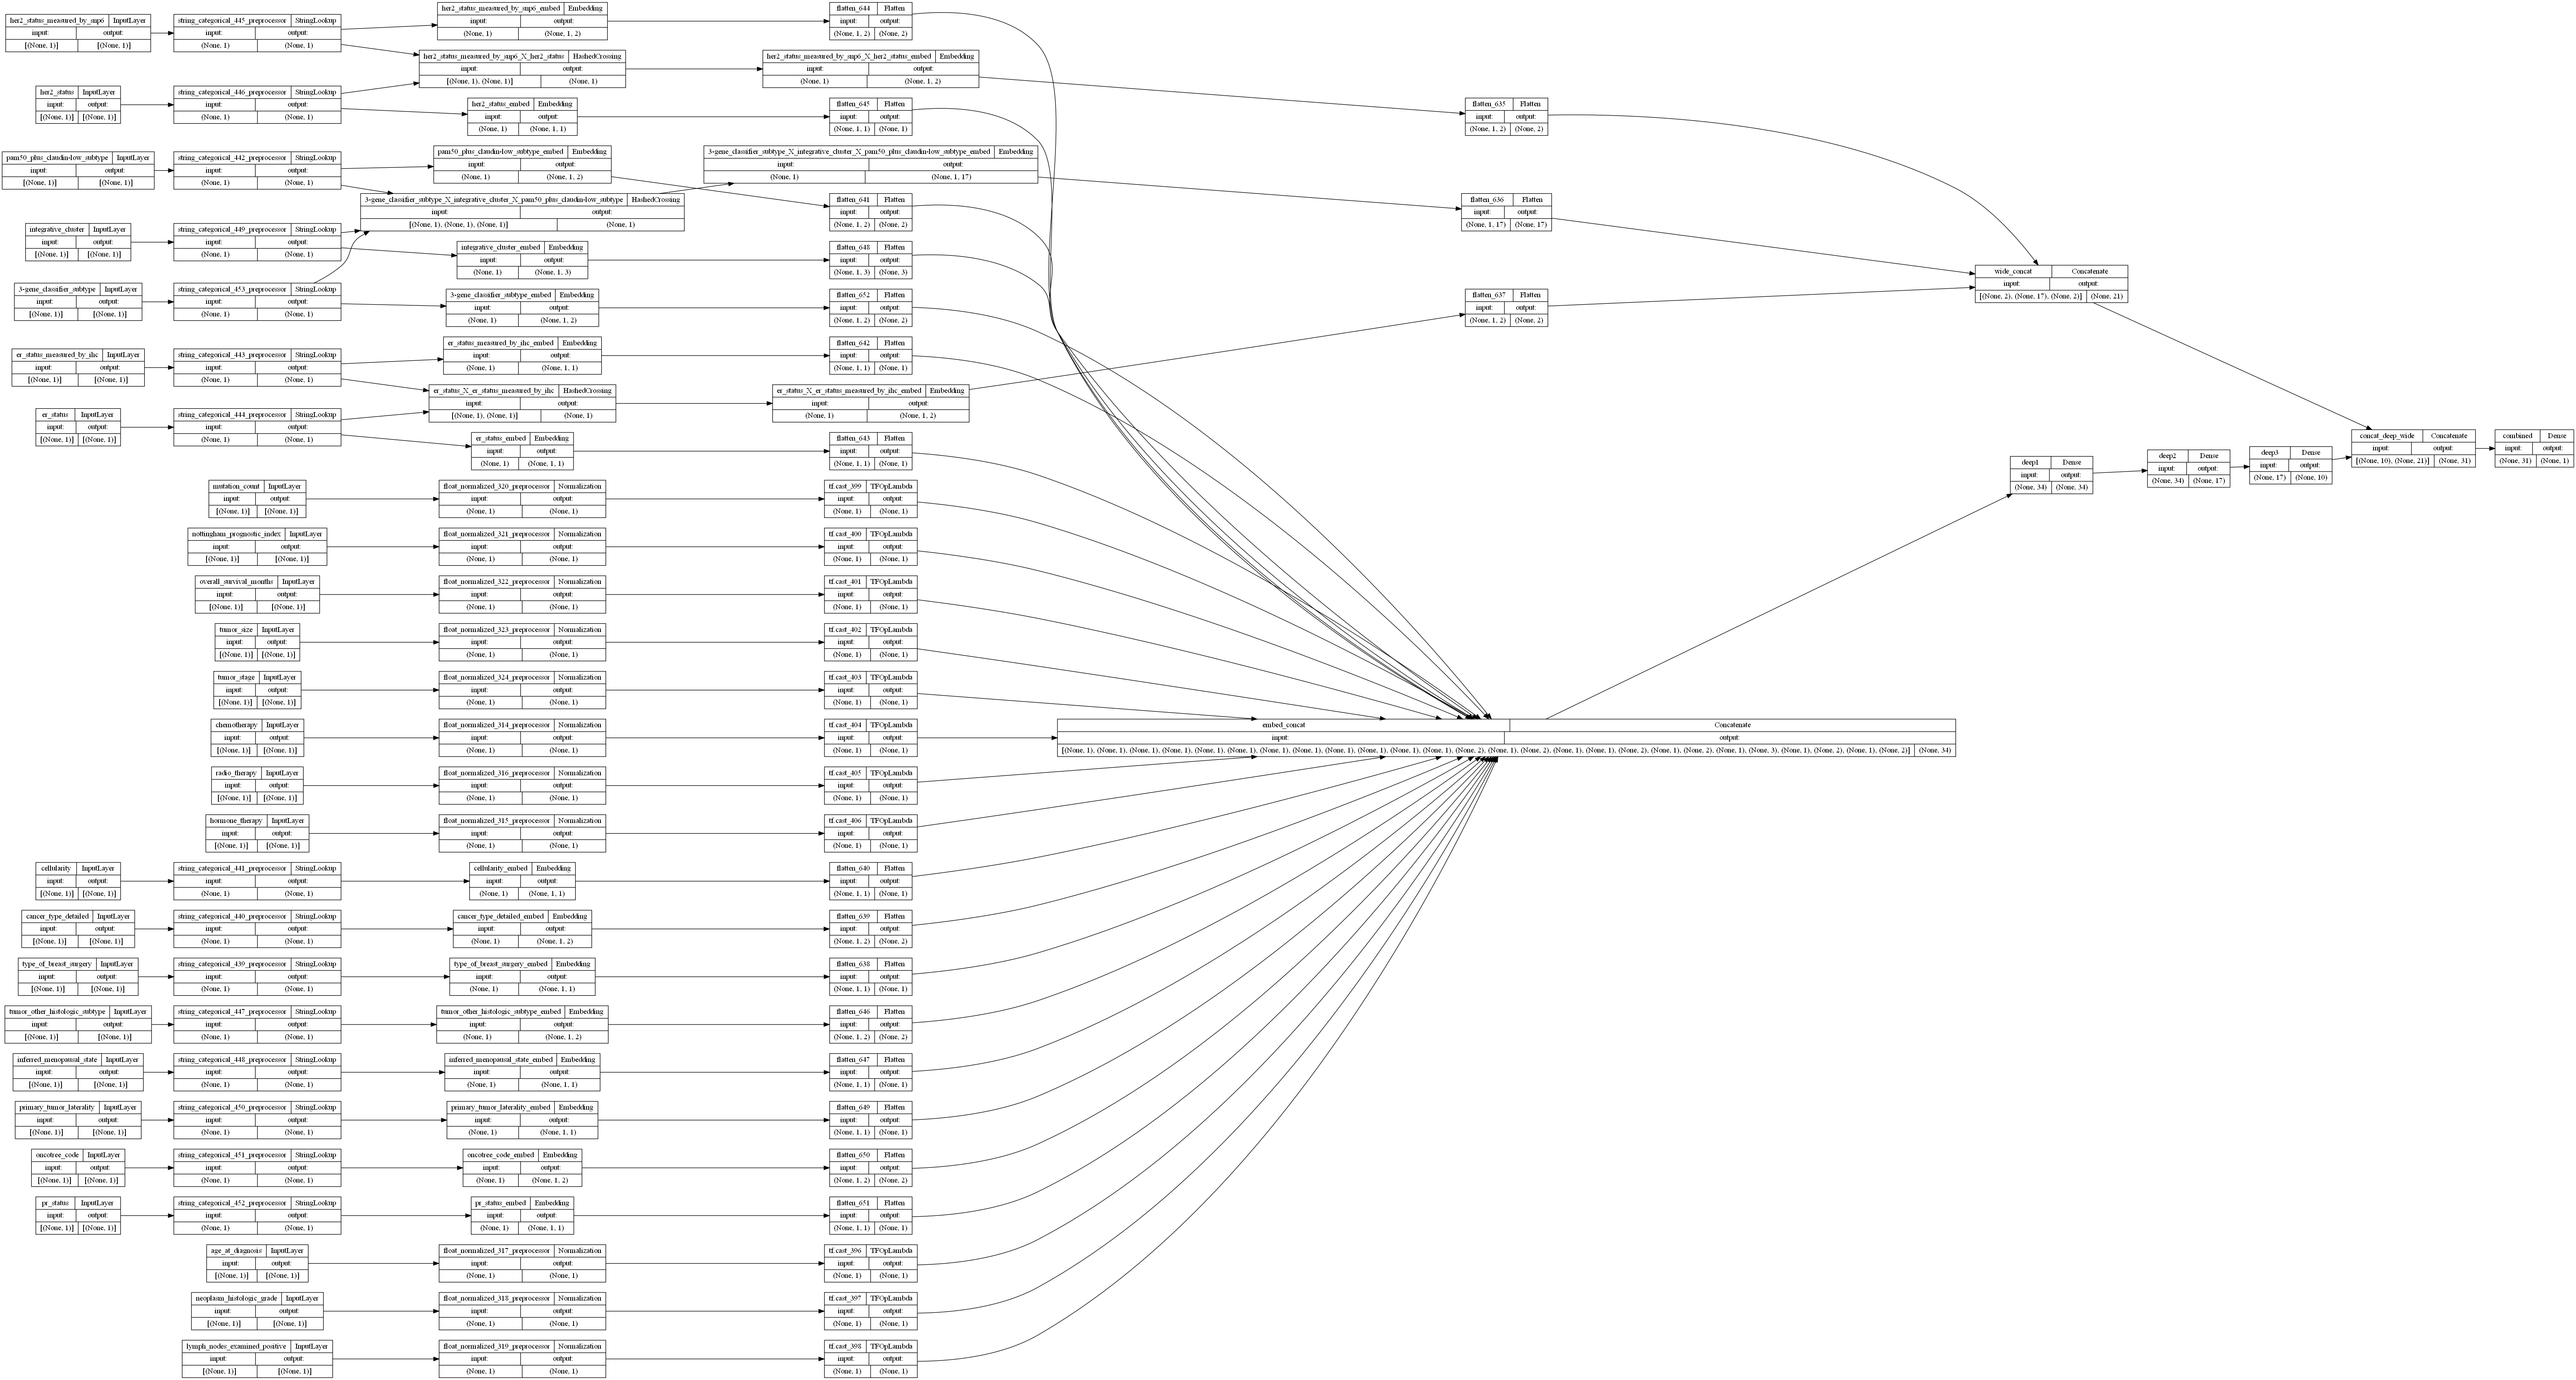

In [487]:
# from keras.metrics import Precision, Recall
dict_inputs = feature_space_2.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space_2.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space_2, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space_2.preprocessors[col].output
    x = tf.cast(x,float) # cast an integer as a float here
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space_2, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=34,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=17,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

training_model_2 = keras.Model(inputs=dict_inputs, outputs=final_branch)

# Source: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
training_model_2.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=['acc',f1_m,precision_m, recall_m]
)

training_model_2.summary()

plot_model(
    training_model_2, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


In [488]:
# train using the already processed features
history_2 = training_model_2.fit(
    ds_train, epochs=15, validation_data=ds_test, verbose=2
)

Epoch 1/15


19/19 - 4s - loss: 0.6784 - acc: 0.5670 - f1_m: 0.3342 - precision_m: 0.8136 - recall_m: 0.2542 - val_loss: 0.6557 - val_acc: 0.6667 - val_f1_m: 0.5209 - val_precision_m: 0.9167 - val_recall_m: 0.3925 - 4s/epoch - 231ms/step
Epoch 2/15
19/19 - 0s - loss: 0.6421 - acc: 0.7109 - f1_m: 0.5894 - precision_m: 0.8316 - recall_m: 0.4842 - val_loss: 0.6249 - val_acc: 0.7593 - val_f1_m: 0.7175 - val_precision_m: 0.8542 - val_recall_m: 0.6650 - 76ms/epoch - 4ms/step
Epoch 3/15
19/19 - 0s - loss: 0.6029 - acc: 0.7481 - f1_m: 0.7024 - precision_m: 0.8116 - recall_m: 0.6567 - val_loss: 0.5847 - val_acc: 0.7654 - val_f1_m: 0.7393 - val_precision_m: 0.8210 - val_recall_m: 0.7158 - 77ms/epoch - 4ms/step
Epoch 4/15
19/19 - 0s - loss: 0.5591 - acc: 0.7630 - f1_m: 0.7296 - precision_m: 0.7956 - recall_m: 0.7142 - val_loss: 0.5429 - val_acc: 0.7840 - val_f1_m: 0.7697 - val_precision_m: 0.8240 - val_recall_m: 0.7667 - 77ms/epoch - 4ms/step
Epoch 5/15
19/19 - 0s - loss: 0.5192 - acc: 0.7742 - f1_m: 0.7510 -

Text(0.5, 0, 'epochs')

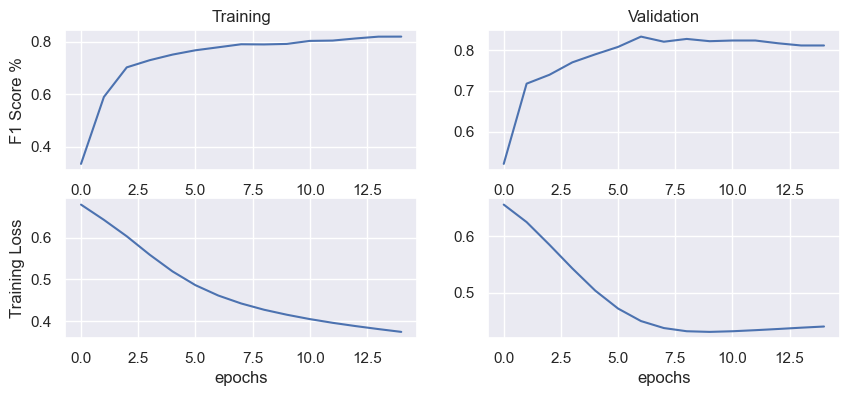

In [489]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history_2.history['f1_m'])

plt.ylabel('F1 Score %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history_2.history['val_f1_m'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history_2.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history_2.history['val_loss'])
plt.xlabel('epochs')

4/4 [==============================] - 1s 3ms/step
[[65 15]
 [15 67]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        80
           1       0.82      0.82      0.82        82

    accuracy                           0.81       162
   macro avg       0.81      0.81      0.81       162
weighted avg       0.81      0.81      0.81       162



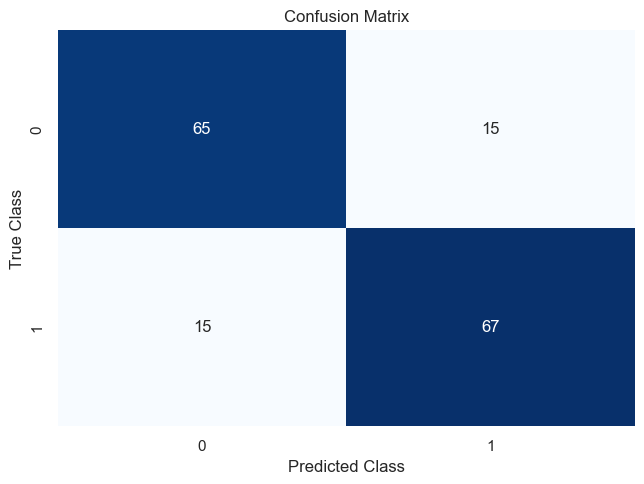

In [490]:
#  Vizualize some metrics associated with this model
# Source: Modified from in-class lecture

# now lets see how well the model performed
yhat_proba_2 = training_model_2.predict(ds_test) # sigmoid output probabilities
# use squeeze to get rid of any extra dimensions 
yhat_2 = np.round(yhat_proba_2.squeeze()) # round to get binary class

conf_mat_2 = mt.confusion_matrix(y_test, yhat_2)

print(conf_mat_2)
print(mt.classification_report(y_test,yhat_2))

# Source: Albon, Chris. Machine Learning with Python Cookbook. O'Reilly Media, 20180309.  VitalBook file.
# Create pandas dataframe
conf_df_2 = pd.DataFrame(conf_mat_2, index=bc_df.death_from_cancer.unique(), columns=bc_df.death_from_cancer.unique())

# Create heatmap
sns.heatmap(conf_df_2, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

With a little trial and error, I adjusted the epoch count down to 15 compared to 25 with model 1. On most runs I see overtraining start to occur after 9-15 epochs with my training loss on my validation data starting to trend upward. Due to this, I can say generally I'm seeing this model converge in fewer epochs. Also, I have an F1 score just slightly better than in model 1. My confusion matrix is roughly the same.

### Model 3 of 3

Here, I'll go back to my original cross-categorical features (feature_space_1) and try changing my optimization method to see what effect that has on the results. For this network I'll use RMSProp instead of ADAM.

Model: "model_37"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 type_of_breast_surgery (InputL  [(None, 1)]         0           []                               
 ayer)                                                                                            
                                                                                                  
 cancer_type_detailed (InputLay  [(None, 1)]         0           []                               
 er)                                                                                              
                                                                                                  
 cellularity (InputLayer)       [(None, 1)]          0           []                               
                                                                                           

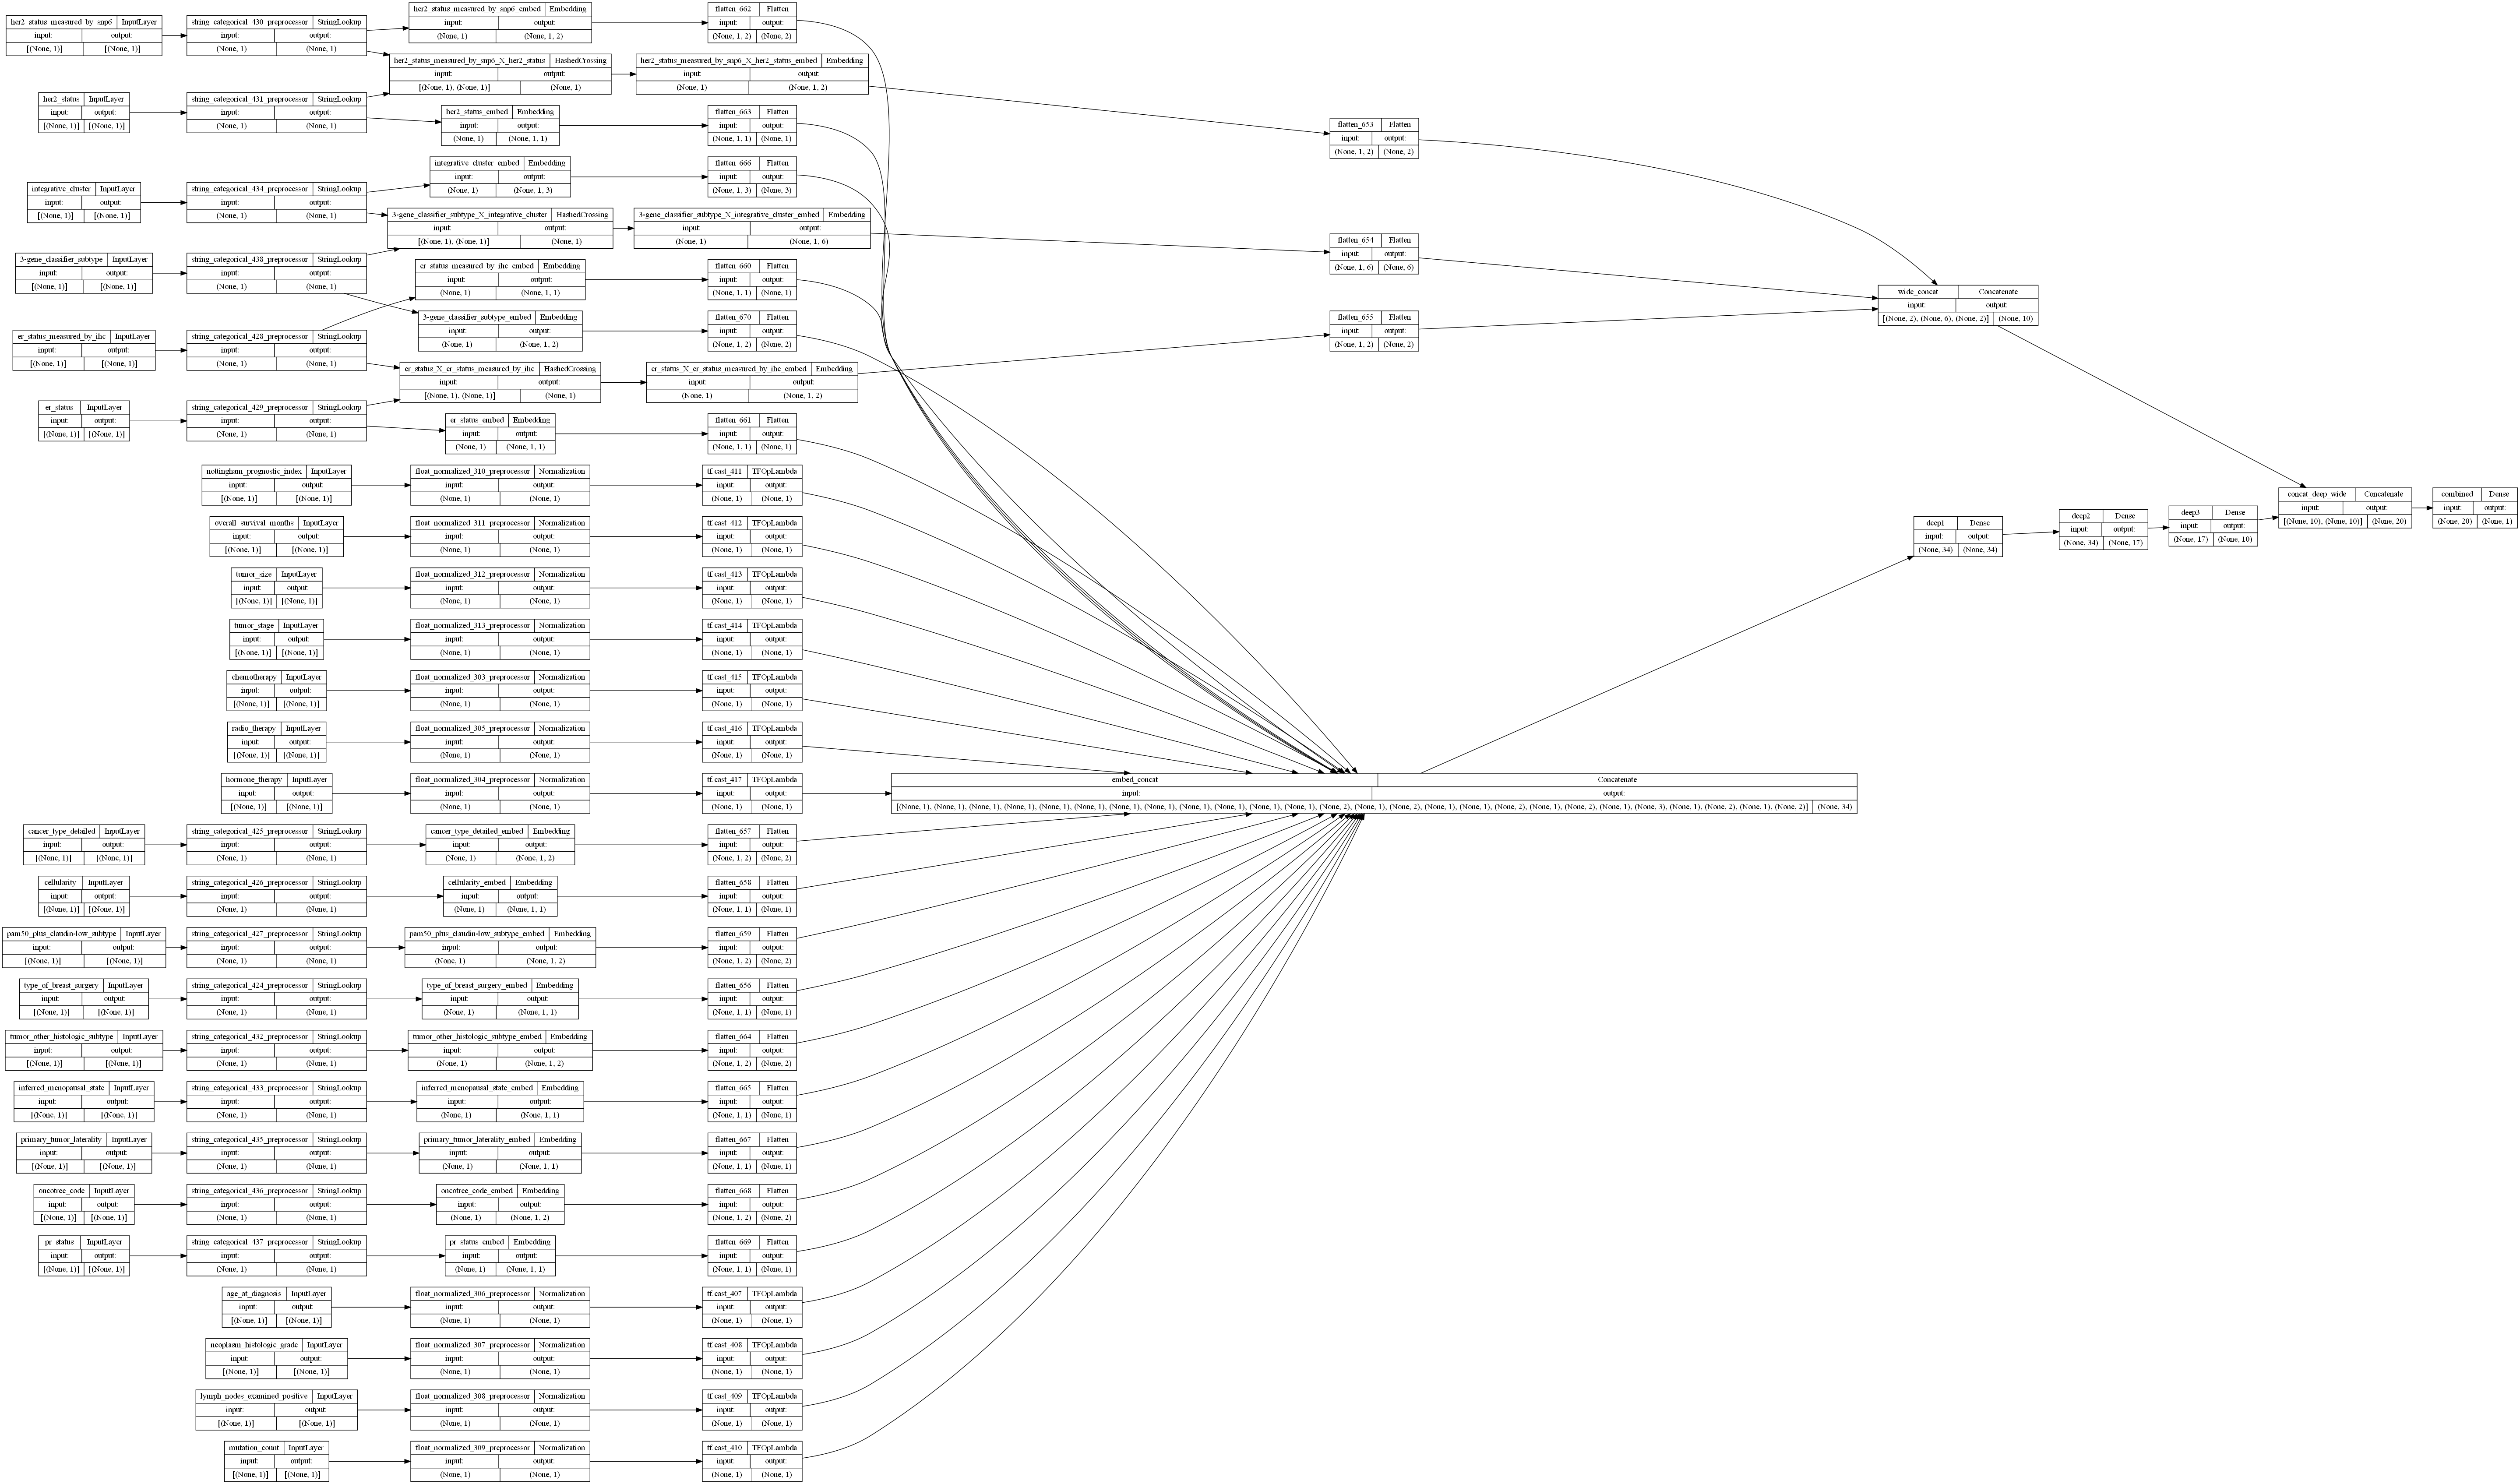

In [491]:
# from keras.metrics import Precision, Recall
dict_inputs = feature_space_1.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space_1.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space_1, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space_1.preprocessors[col].output
    x = tf.cast(x,float) # cast an integer as a float here
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space_1, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=34,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=17,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

training_model_3 = keras.Model(inputs=dict_inputs, outputs=final_branch)

# Source: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
training_model_3.compile(
    optimizer="RMSProp", loss="binary_crossentropy", metrics=['acc',f1_m,precision_m, recall_m]
)

training_model_3.summary()

plot_model(
    training_model_3, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


In [492]:
# train using the already processed features
history_3 = training_model_3.fit(
    ds_train, epochs=20, validation_data=ds_test, verbose=2
)

Epoch 1/20


19/19 - 4s - loss: 0.6477 - acc: 0.6365 - f1_m: 0.4069 - precision_m: 0.8202 - recall_m: 0.2962 - val_loss: 0.6280 - val_acc: 0.7222 - val_f1_m: 0.6945 - val_precision_m: 0.7586 - val_recall_m: 0.6725 - 4s/epoch - 194ms/step
Epoch 2/20
19/19 - 0s - loss: 0.5937 - acc: 0.7320 - f1_m: 0.6863 - precision_m: 0.7916 - recall_m: 0.6527 - val_loss: 0.5864 - val_acc: 0.7346 - val_f1_m: 0.7364 - val_precision_m: 0.7493 - val_recall_m: 0.7842 - 75ms/epoch - 4ms/step
Epoch 3/20
19/19 - 0s - loss: 0.5551 - acc: 0.7680 - f1_m: 0.7347 - precision_m: 0.8019 - recall_m: 0.7231 - val_loss: 0.5488 - val_acc: 0.7407 - val_f1_m: 0.7507 - val_precision_m: 0.7373 - val_recall_m: 0.8142 - 71ms/epoch - 4ms/step
Epoch 4/20
19/19 - 0s - loss: 0.5223 - acc: 0.7742 - f1_m: 0.7449 - precision_m: 0.7896 - recall_m: 0.7459 - val_loss: 0.5182 - val_acc: 0.7593 - val_f1_m: 0.7727 - val_precision_m: 0.7463 - val_recall_m: 0.8550 - 71ms/epoch - 4ms/step
Epoch 5/20
19/19 - 0s - loss: 0.4965 - acc: 0.7841 - f1_m: 0.7599 -

Text(0.5, 0, 'epochs')

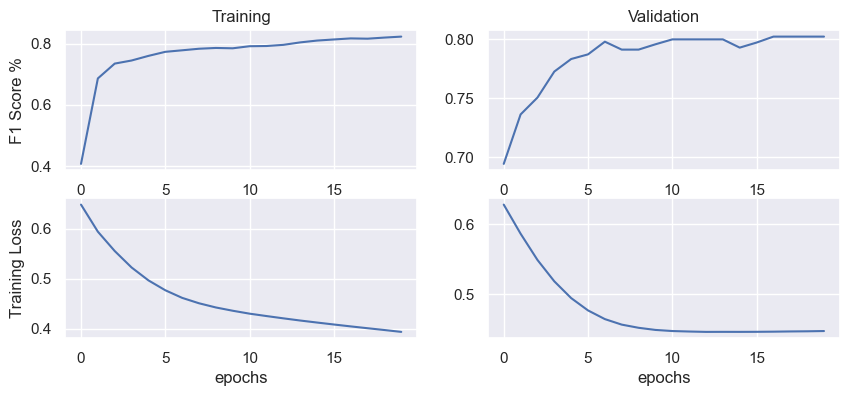

In [493]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history_3.history['f1_m'])

plt.ylabel('F1 Score %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history_3.history['val_f1_m'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history_3.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history_3.history['val_loss'])
plt.xlabel('epochs')

4/4 [==============================] - 1s 2ms/step
[[62 18]
 [14 68]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.79        80
           1       0.79      0.83      0.81        82

    accuracy                           0.80       162
   macro avg       0.80      0.80      0.80       162
weighted avg       0.80      0.80      0.80       162



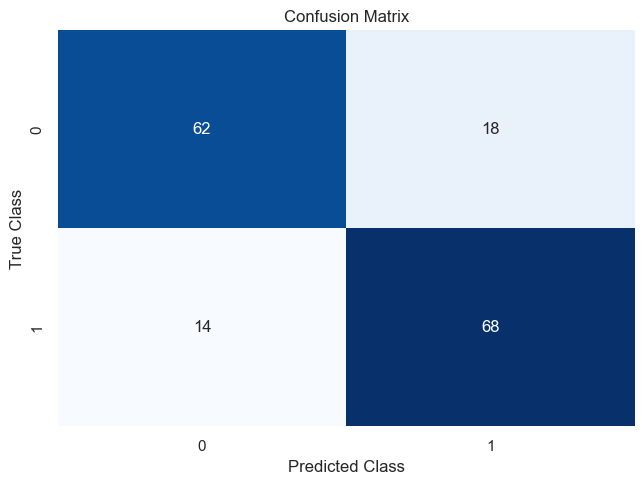

In [494]:
#  Vizualize some metrics associated with this model

# Source: Modified from in-class lecture
# Use the sklearn metrics here, if you want to
# from sklearn import metrics as mt

# y_test = tf.concat([y for x, y in ds_test], axis=0)
# y_test = y_test.numpy()

# now lets see how well the model performed
yhat_proba_3 = training_model_3.predict(ds_test) # sigmoid output probabilities
# use squeeze to get rid of any extra dimensions 
yhat_3 = np.round(yhat_proba_3.squeeze()) # round to get binary class

conf_mat_3 = mt.confusion_matrix(y_test, yhat_3)

print(conf_mat_3)
print(mt.classification_report(y_test,yhat_3))

# Source: Albon, Chris. Machine Learning with Python Cookbook. O'Reilly Media, 20180309.  VitalBook file.
# Create pandas dataframe
conf_df_3 = pd.DataFrame(conf_mat_3, index=bc_df.death_from_cancer.unique(), columns=bc_df.death_from_cancer.unique())

# Create heatmap
sns.heatmap(conf_df_3, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

This third model performed very similarly to the first which I found interesting. I have a very similar F1 score and but my confusion matrix is a little worse. I can't draw any real conclusions about the change in optimizer. After running all of these models several times I can say that the results jumped around. I had F1 scores from 80 to 84 across all three models which switched from model to model. Any of these would be viable candidates to carry forward to the next evaluation. 

### Investigating Generalization Performance

For this portion of the lab I will use model 2 of 3 from above, which specifically means I'll be using training_model_2 and feature_space_2. Any model would have likely been appropriate and seemed comparable, however during multiple runs, that model appeared to converge the fastest on the validation data.

Per the instructions, I consider model 2 of 3 above to be one of the two required for this portion of the rubric. Therefore I now need to alter model 2 to see if different performance can be achieved. To do this I'll be adding a layer to the deep portion of the network to step it down a little closer to my final binary output layer. I also changed the number of neurons in the last two layers. Finally I altered the number of epochs after a few test runs showed my model taking longer to converge on validation. 

Model: "model_38"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 type_of_breast_surgery (InputL  [(None, 1)]         0           []                               
 ayer)                                                                                            
                                                                                                  
 cancer_type_detailed (InputLay  [(None, 1)]         0           []                               
 er)                                                                                              
                                                                                                  
 cellularity (InputLayer)       [(None, 1)]          0           []                               
                                                                                           

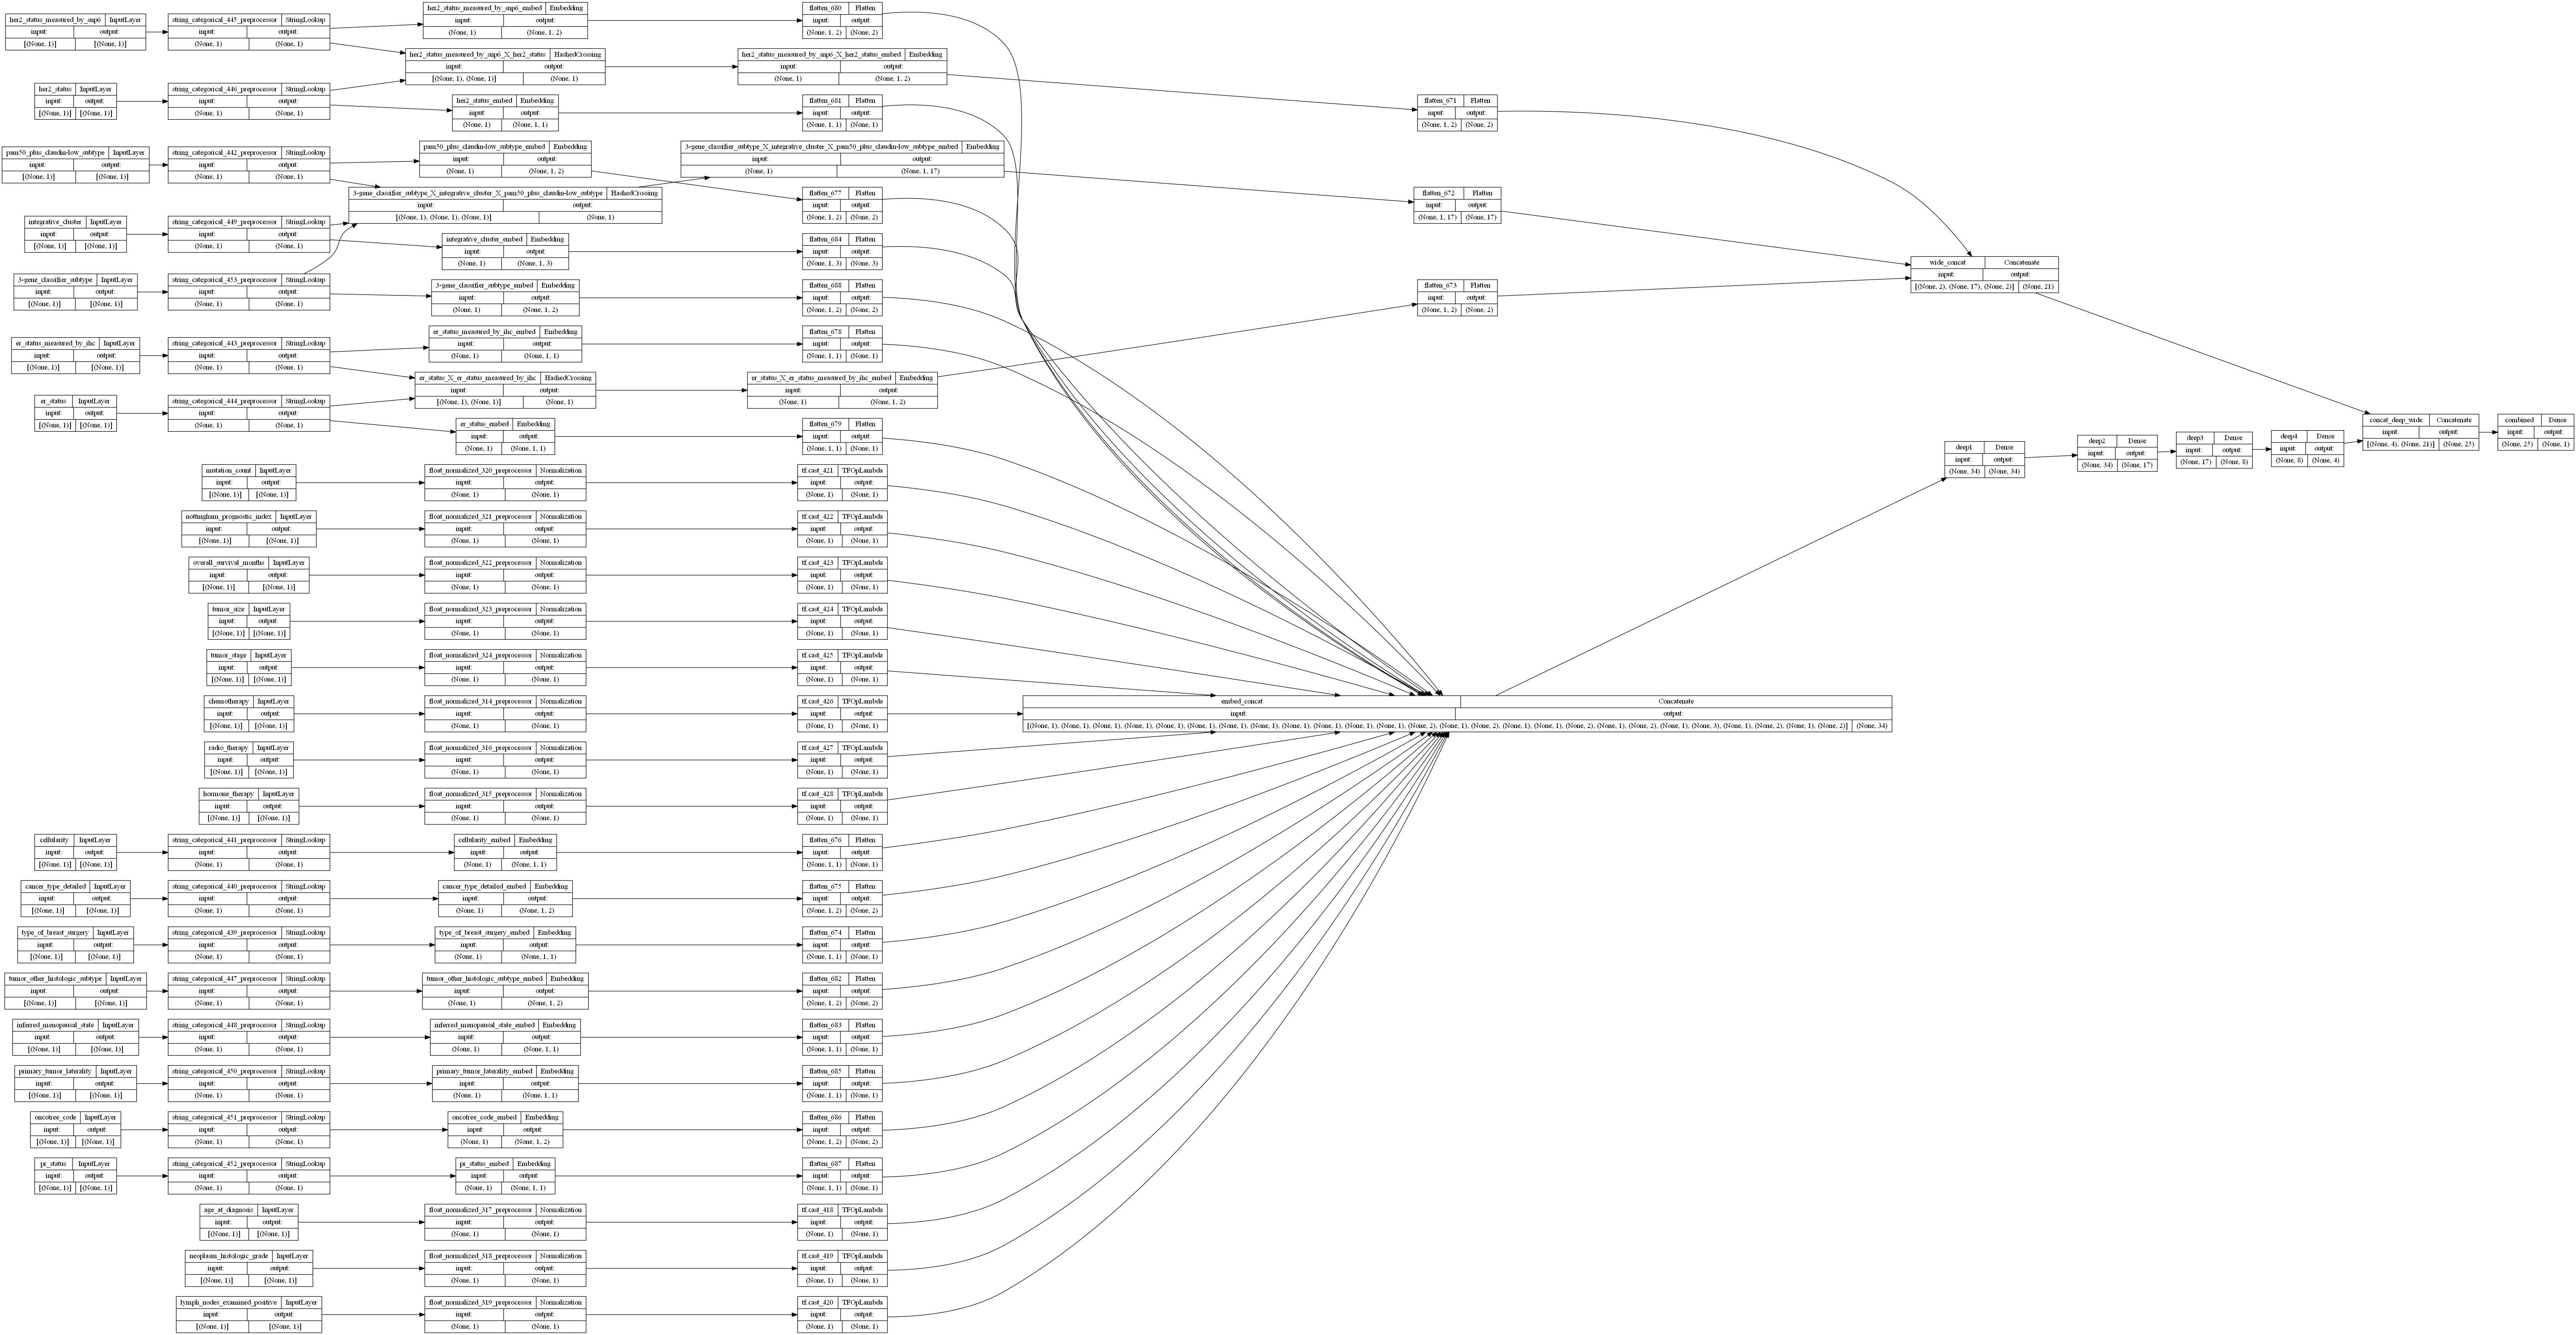

In [495]:
# from keras.metrics import Precision, Recall
dict_inputs = feature_space_2.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space_2.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space_2, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space_2.preprocessors[col].output
    x = tf.cast(x,float) # cast an integer as a float here
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space_2, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=34,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=17,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=8,activation='relu', name='deep3')(deep_branch) # Changed from 10 to 8 neurons
deep_branch = Dense(units=4,activation='relu', name='deep4')(deep_branch) # This is my new layer

    
# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

training_model_4 = keras.Model(inputs=dict_inputs, outputs=final_branch)

# Source: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
training_model_4.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=['acc',f1_m,precision_m, recall_m]
)

training_model_4.summary()

plot_model(
    training_model_4, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


In [496]:
# train using the already processed features
history_4 = training_model_4.fit(
    ds_train, epochs=25, validation_data=ds_test, verbose=2
) # changed number of epochs

Epoch 1/25


19/19 - 4s - loss: 0.6965 - acc: 0.5261 - f1_m: 0.1033 - precision_m: 0.5263 - recall_m: 0.0598 - val_loss: 0.6834 - val_acc: 0.5370 - val_f1_m: 0.1642 - val_precision_m: 0.7500 - val_recall_m: 0.0942 - 4s/epoch - 236ms/step
Epoch 2/25
19/19 - 0s - loss: 0.6697 - acc: 0.6154 - f1_m: 0.3665 - precision_m: 0.8351 - recall_m: 0.2450 - val_loss: 0.6695 - val_acc: 0.6296 - val_f1_m: 0.4410 - val_precision_m: 0.9167 - val_recall_m: 0.2992 - 75ms/epoch - 4ms/step
Epoch 3/25
19/19 - 0s - loss: 0.6517 - acc: 0.6675 - f1_m: 0.5365 - precision_m: 0.8302 - recall_m: 0.4060 - val_loss: 0.6542 - val_acc: 0.6728 - val_f1_m: 0.5523 - val_precision_m: 0.8750 - val_recall_m: 0.4200 - 76ms/epoch - 4ms/step
Epoch 4/25
19/19 - 0s - loss: 0.6305 - acc: 0.7097 - f1_m: 0.6119 - precision_m: 0.8386 - recall_m: 0.4940 - val_loss: 0.6339 - val_acc: 0.7037 - val_f1_m: 0.6318 - val_precision_m: 0.8495 - val_recall_m: 0.5342 - 77ms/epoch - 4ms/step
Epoch 5/25
19/19 - 0s - loss: 0.6040 - acc: 0.7357 - f1_m: 0.6734 -

Text(0.5, 0, 'epochs')

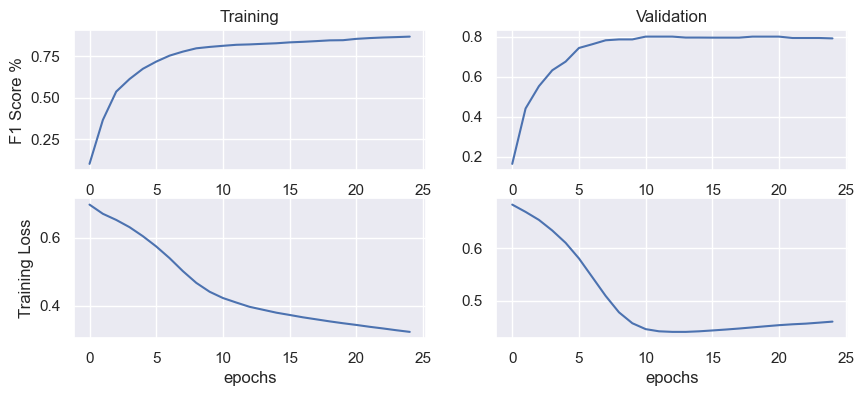

In [497]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history_4.history['f1_m'])

plt.ylabel('F1 Score %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history_4.history['val_f1_m'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history_4.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history_4.history['val_loss'])
plt.xlabel('epochs')

Generally, I saw my model convergence all over the map on multiple runs. I changed the number of epochs after a few test runs. Now I'm converging between 10-15 epochs. However I'd like to see my loss getting overall a little lower to be confident I'm getting better performance. I'm not seeing that between the orignal model 2 and this altered version. I do see overtraining occurring in this model as my validation training loss begins to trend back upward after about 12 epochs.

To verify whether my models are really different, I'll peform a statistical analysis of the two.

4/4 [==============================] - 1s 2ms/step
[[64 16]
 [17 65]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        80
           1       0.80      0.79      0.80        82

    accuracy                           0.80       162
   macro avg       0.80      0.80      0.80       162
weighted avg       0.80      0.80      0.80       162



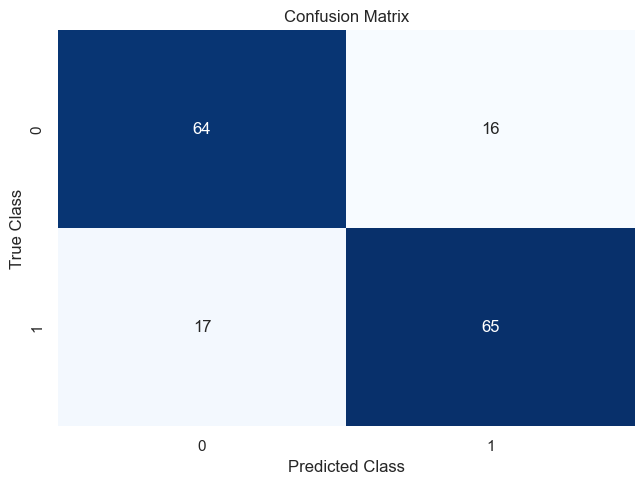

In [498]:
#  Vizualize some metrics associated with this model

# Source: Modified from in-class lecture
# Use the sklearn metrics here, if you want to
# from sklearn import metrics as mt

# y_test = tf.concat([y for x, y in ds_test], axis=0)
# y_test = y_test.numpy()

# now lets see how well the model performed
yhat_proba_4 = training_model_4.predict(ds_test) # sigmoid output probabilities
# use squeeze to get rid of any extra dimensions 
yhat_4 = np.round(yhat_proba_4.squeeze()) # round to get binary class

conf_mat_4 = mt.confusion_matrix(y_test, yhat_4)

print(conf_mat_4)
print(mt.classification_report(y_test,yhat_4))

# Source: Albon, Chris. Machine Learning with Python Cookbook. O'Reilly Media, 20180309.  VitalBook file.
# Create pandas dataframe
conf_df_4 = pd.DataFrame(conf_mat_4, index=bc_df.death_from_cancer.unique(), columns=bc_df.death_from_cancer.unique())

# Create heatmap
sns.heatmap(conf_df_4, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

#### Comparison between model 2 and model 4

To determine which model truly performed better I need to understand whether the models are really different from one another. 

Initially, I split my data using KFold and 6 folds, then used those training and test sets for each model. So the models are all trained on the exact same data. So instead of looking at the f1_scores for each fold, I'm going to compare the f1_scores measured during model fitting.

In another dataset, this could potentially cause me problems as I'm comparing the results of the entire dataset to one another as opposed to each fold. However, because my prediction classes are perfectly balanced, and the data for each model is identical, I believe this will still yield some useful information for comparison.

*Note, ideally I'd run a cross_val_score here but I couldn't get it to work with the keras models despite multiple efforts.*

In [499]:
from scipy.stats import t

# Get the histories of val_f1 scores from my two models for comparison
f1_score_model_2 = history_2.history['val_f1_m']
f1_score_model_4 = history_4.history['val_f1_m']

# get error rates for both model's f1 scores
model_2_err = [1 - f1 for f1 in f1_score_model_2]
model_4_err = [1 - f1 for f1 in f1_score_model_4]

d = []
for err in range(len(model_2_err)):
    d.append(model_2_err[err] - model_4_err[err])

dbar = sum(d) / len(d)
stdtot = np.std(d)

epochs = 12
confidence_level = 0.95
degrees_of_freedom = epochs

# Calculate the critical value, t
t = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

# print(f'The error of the three models is\n', acc1.mean(), '\n', acc2.mean(), '\n', acc3.mean())
print('Range of:', dbar-t*stdtot,dbar+t*stdtot, 'between model 2 and model 4')

Range of: -0.3139904159770698 0.12504712725344203 between model 2 and model 4


An interesting note about my statistical analysis. I ran these models multiple times. There were times in which the models showed there was no statistical difference (range contained 0), and there were times it showed there was (range did not contain 0). This was with no model changes at all. That doesn't fill me with confidence that I've implemented everything correctly. And gives me even less faith in statistics. Here are a few values from sample runs:
 -  Range of: -0.33352213888834137 0.20063908685714227 between model 2 and model 4 -- Statistically different
 -  Range of: -0.086830071054072 0.0883182957193959 between model 2 and model 4 -- Statistically not different
 -  Range of: -0.08561457731365749 0.06702024875123888 between model 2 and model 4 -- Statistically different

Because of these mixed results I'll speak to these results from two angles. If the two models are NOT statistically different, then any given run may result in values that are better or worse than one another, and therefore either model performs roughly the same. However, if we take the opposite case that they ARE statistically different, then the difference could only be minor as the results overalp so frequently.

### Performance Comparision vs MLP (Deep Side)

For this comparison I'll be using just the deep side of my wide and deep neural network along with my best performing model. I've mentioned the interchangeability of "best model" several times throughout this notebook, so which model I select does not truly make a large difference here. For the sake of consistency, I'm going to use model 2 as I did for my previous section's comparisons.

In [500]:
# Source: Modified from in-class lecture to match my dataset
from tensorflow.keras.utils import FeatureSpace

feature_space_mlp = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "type_of_breast_surgery": FeatureSpace.string_categorical(num_oov_indices=0),
        "cancer_type_detailed": FeatureSpace.string_categorical(num_oov_indices=0),
        "cellularity": FeatureSpace.string_categorical(num_oov_indices=0),
        "pam50_plus_claudin-low_subtype": FeatureSpace.string_categorical(num_oov_indices=0),
        "er_status_measured_by_ihc": FeatureSpace.string_categorical(num_oov_indices=0),
        "er_status": FeatureSpace.string_categorical(num_oov_indices=0),
        "her2_status_measured_by_snp6": FeatureSpace.string_categorical(num_oov_indices=0),
        "her2_status": FeatureSpace.string_categorical(num_oov_indices=0),
        "tumor_other_histologic_subtype": FeatureSpace.string_categorical(num_oov_indices=0),
        # "tumor_other_histologic_subtype": FeatureSpace.string_categorical(num_oov_indices=0),
        "inferred_menopausal_state": FeatureSpace.string_categorical(num_oov_indices=0),
        "integrative_cluster": FeatureSpace.string_categorical(num_oov_indices=0),
        "primary_tumor_laterality": FeatureSpace.string_categorical(num_oov_indices=0),
        "oncotree_code": FeatureSpace.string_categorical(num_oov_indices=0),
        "pr_status": FeatureSpace.string_categorical(num_oov_indices=0),
        "3-gene_classifier_subtype": FeatureSpace.string_categorical(num_oov_indices=0),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert
        "chemotherapy": FeatureSpace.float_normalized(),
        "hormone_therapy": FeatureSpace.float_normalized(),
        "radio_therapy": FeatureSpace.float_normalized(),
        "age_at_diagnosis": FeatureSpace.float_normalized(),
        "neoplasm_histologic_grade": FeatureSpace.float_normalized(),
        "lymph_nodes_examined_positive": FeatureSpace.float_normalized(),
        "mutation_count": FeatureSpace.float_normalized(),
        "nottingham_prognostic_index": FeatureSpace.float_normalized(),
        "overall_survival_months": FeatureSpace.float_normalized(),
        "tumor_size": FeatureSpace.float_normalized(),
        "tumor_stage": FeatureSpace.float_normalized(),
    },
    output_mode="concat", 
)


# now that we have specified the preprocessing, let's run it on the data

# create a version of the dataset that can be iterated without labels
train_ds_with_no_labels = ds_train.map(lambda x, _: x)  
feature_space_mlp.adapt(train_ds_with_no_labels) # inititalize the feature map to this data

Model: "model_39"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 type_of_breast_surgery (InputL  [(None, 1)]         0           []                               
 ayer)                                                                                            
                                                                                                  
 cancer_type_detailed (InputLay  [(None, 1)]         0           []                               
 er)                                                                                              
                                                                                                  
 cellularity (InputLayer)       [(None, 1)]          0           []                               
                                                                                           

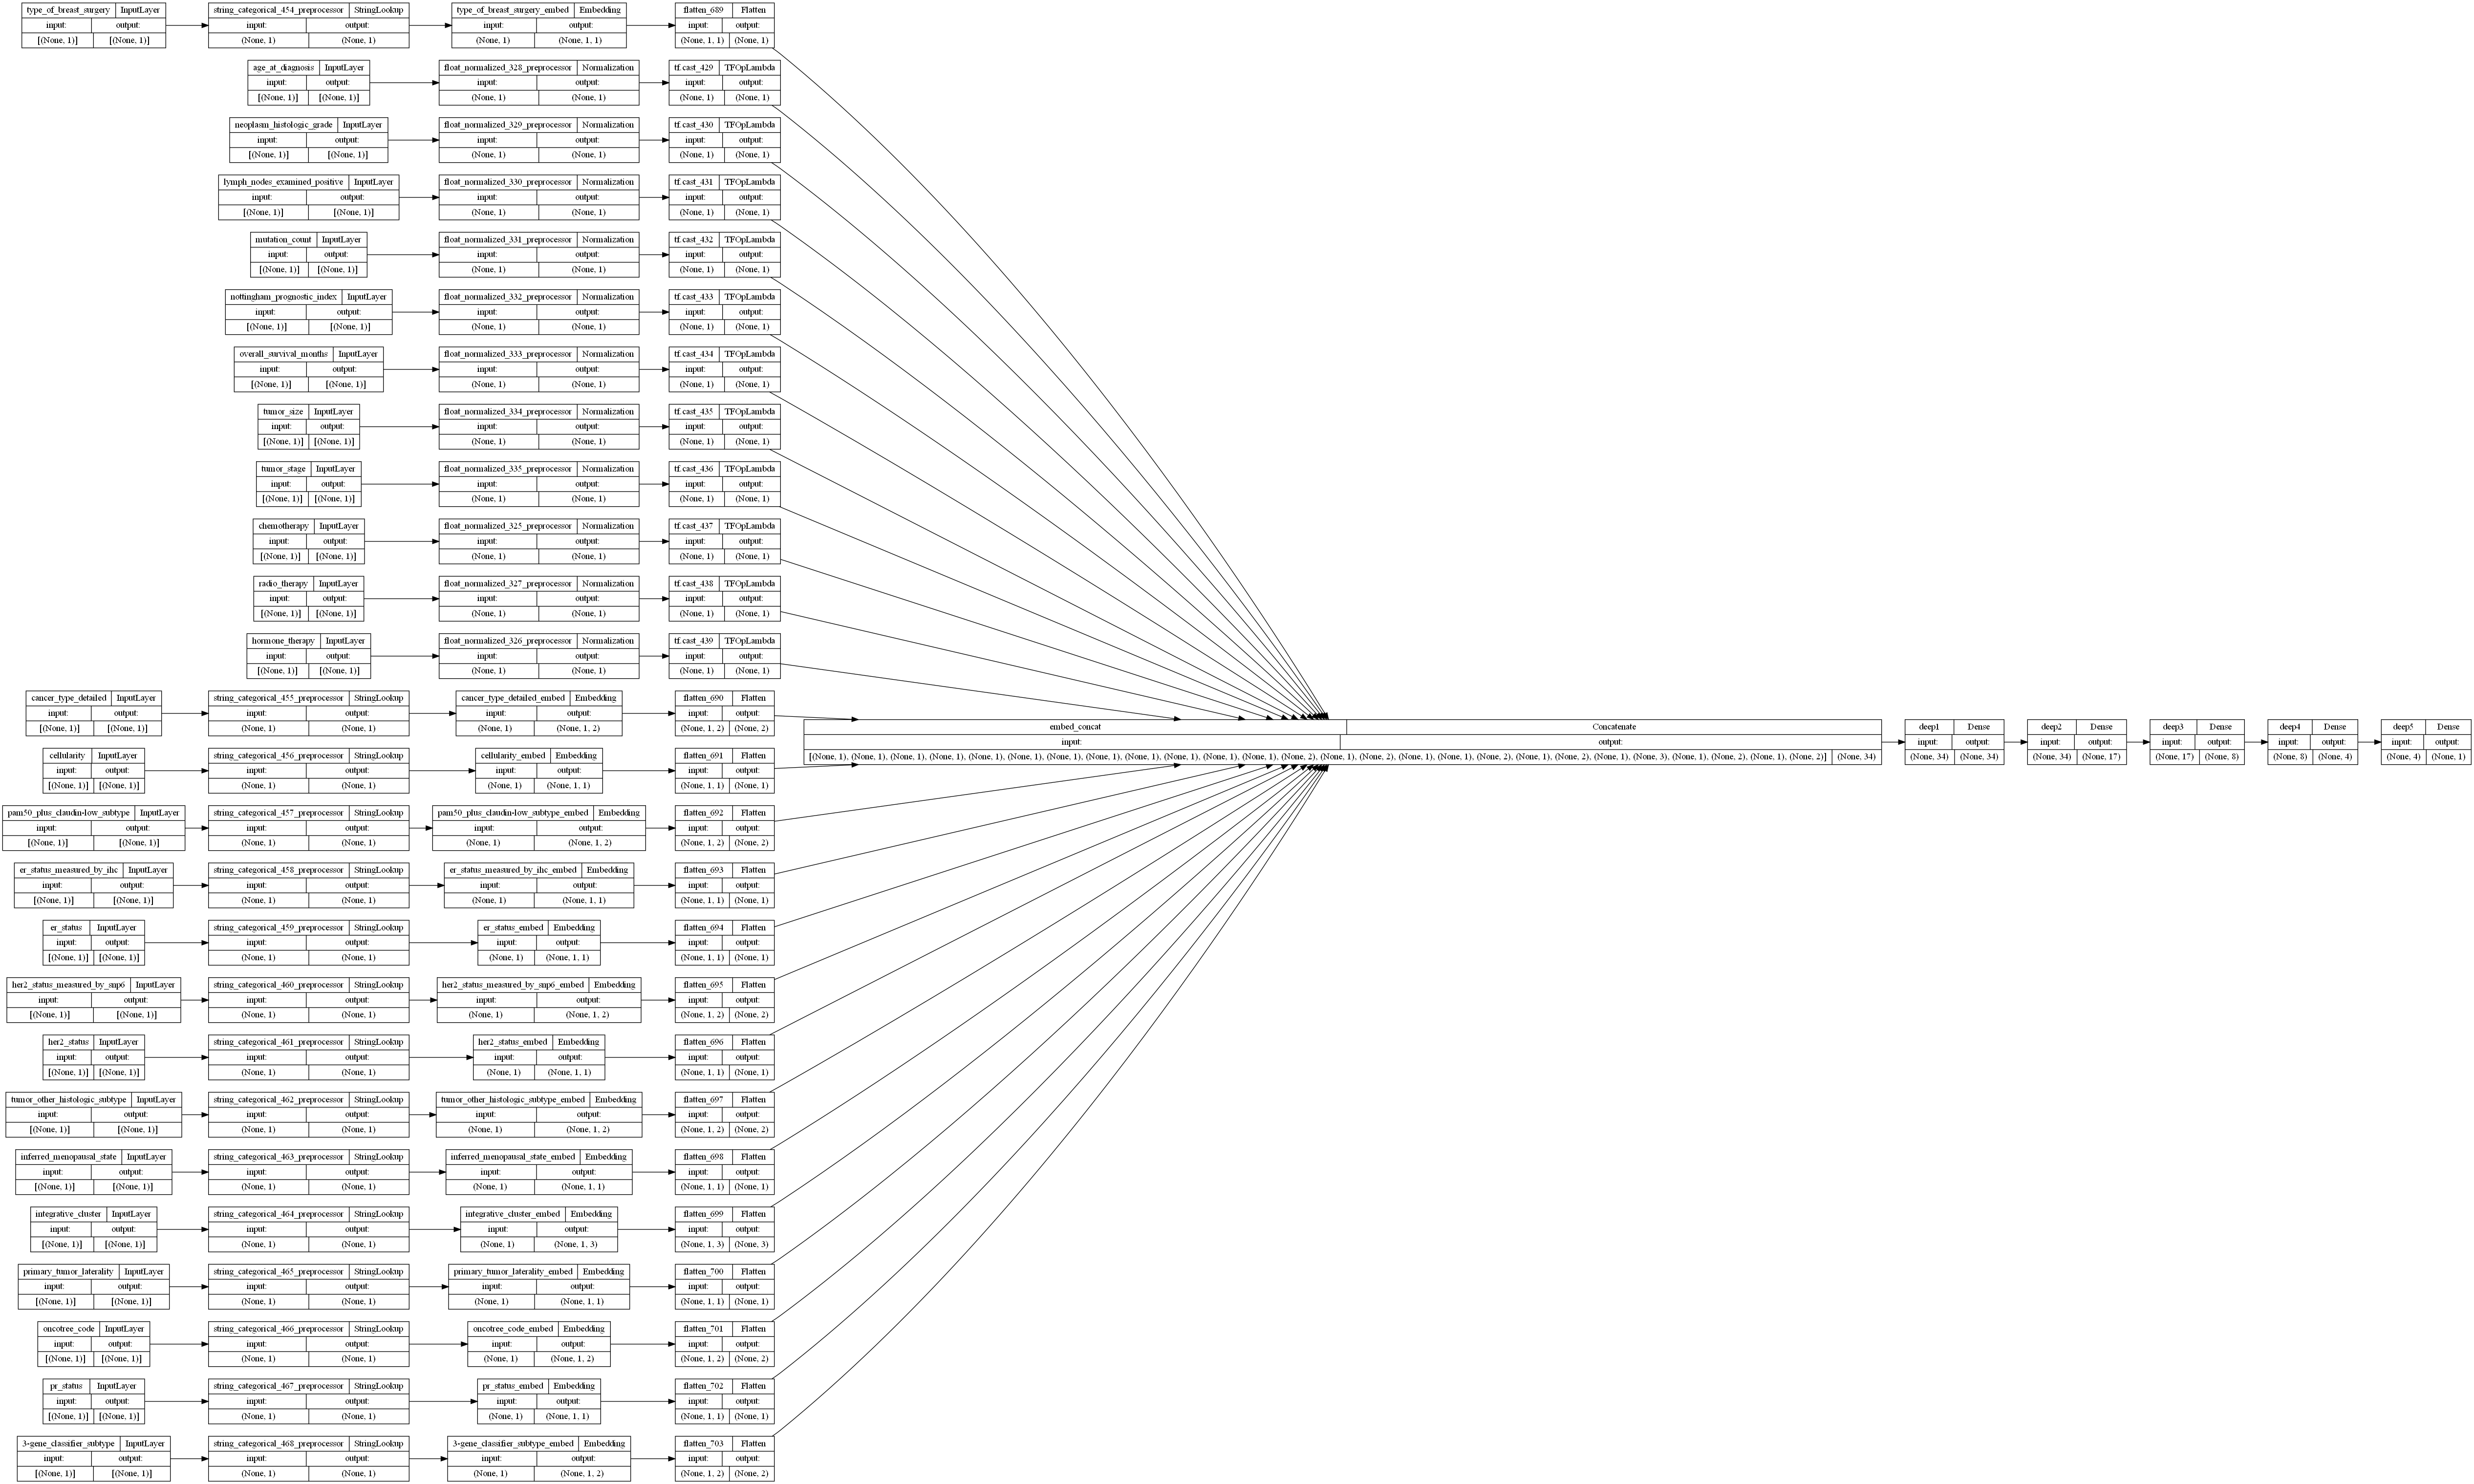

In [501]:
# from keras.metrics import Precision, Recall
dict_inputs = feature_space_mlp.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space_mlp.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space_mlp, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
# wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space_mlp.preprocessors[col].output
    x = tf.cast(x,float) # cast an integer as a float here
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space_mlp, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=34,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=17,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=8,activation='relu', name='deep3')(deep_branch) # Changed from 10 to 8 neurons
deep_branch = Dense(units=4,activation='relu', name='deep4')(deep_branch) # This is my new layer
deep_branch = Dense(units=1,activation='sigmoid', name='deep5')(deep_branch) # adding this sigmoid layer to make a complete MLP representation from the Deep side

training_model_mlp = keras.Model(inputs=dict_inputs, outputs=deep_branch)

# Source: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
training_model_mlp.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=['acc',f1_m,precision_m, recall_m]
)

training_model_mlp.summary()

plot_model(
    training_model_mlp, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


In [502]:
# train using the already processed features
history_mlp = training_model_mlp.fit(
    ds_train, epochs=35, validation_data=ds_test, verbose=2
) # changed number of epochs

Epoch 1/35


19/19 - 6s - loss: 0.6599 - acc: 0.5645 - f1_m: 0.2866 - precision_m: 0.6511 - recall_m: 0.1948 - val_loss: 0.6304 - val_acc: 0.6543 - val_f1_m: 0.5149 - val_precision_m: 0.8018 - val_recall_m: 0.4025 - 6s/epoch - 311ms/step
Epoch 2/35
19/19 - 0s - loss: 0.6023 - acc: 0.7370 - f1_m: 0.6602 - precision_m: 0.8006 - recall_m: 0.5892 - val_loss: 0.5950 - val_acc: 0.7778 - val_f1_m: 0.7736 - val_precision_m: 0.7866 - val_recall_m: 0.8067 - 71ms/epoch - 4ms/step
Epoch 3/35
19/19 - 0s - loss: 0.5685 - acc: 0.7742 - f1_m: 0.7608 - precision_m: 0.7758 - recall_m: 0.7939 - val_loss: 0.5600 - val_acc: 0.8210 - val_f1_m: 0.8179 - val_precision_m: 0.8201 - val_recall_m: 0.8700 - 70ms/epoch - 4ms/step
Epoch 4/35
19/19 - 0s - loss: 0.5355 - acc: 0.7816 - f1_m: 0.7721 - precision_m: 0.7862 - recall_m: 0.8088 - val_loss: 0.5232 - val_acc: 0.8086 - val_f1_m: 0.8076 - val_precision_m: 0.8072 - val_recall_m: 0.8600 - 71ms/epoch - 4ms/step
Epoch 5/35
19/19 - 0s - loss: 0.5016 - acc: 0.8040 - f1_m: 0.7949 -

Text(0.5, 0, 'epochs')

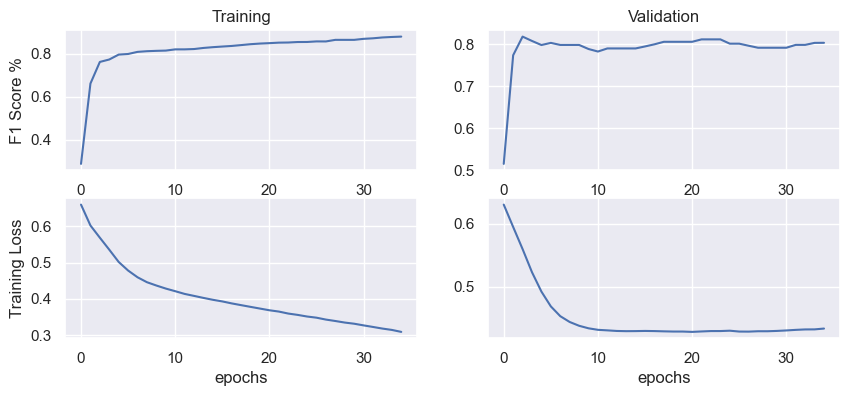

In [503]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history_mlp.history['f1_m'])

plt.ylabel('F1 Score %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history_mlp.history['val_f1_m'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history_mlp.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history_mlp.history['val_loss'])
plt.xlabel('epochs')

4/4 [==============================] - 0s 2ms/step
[[64 16]
 [17 65]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        80
           1       0.80      0.79      0.80        82

    accuracy                           0.80       162
   macro avg       0.80      0.80      0.80       162
weighted avg       0.80      0.80      0.80       162



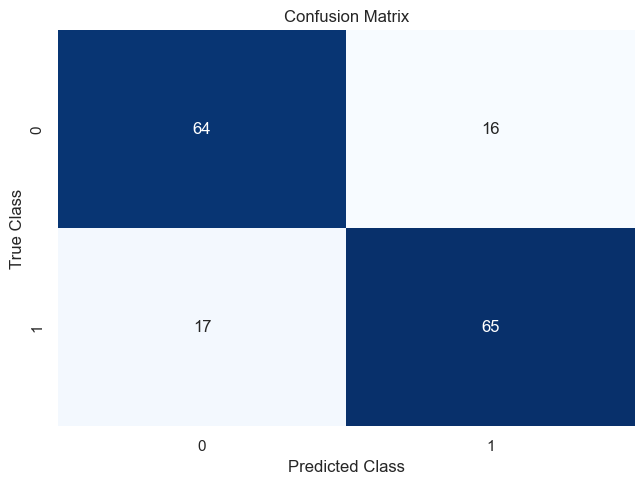

In [504]:
#  Vizualize some metrics associated with this model
# Source: Modified from in-class lecture

# now lets see how well the model performed
yhat_proba_mlp = training_model_mlp.predict(ds_test) # sigmoid output probabilities
# use squeeze to get rid of any extra dimensions 
yhat_4 = np.round(yhat_proba_4.squeeze()) # round to get binary class

conf_mat_4 = mt.confusion_matrix(y_test, yhat_4)

print(conf_mat_4)
print(mt.classification_report(y_test,yhat_4))

# Source: Albon, Chris. Machine Learning with Python Cookbook. O'Reilly Media, 20180309.  VitalBook file.
# Create pandas dataframe
conf_df_4 = pd.DataFrame(conf_mat_4, index=bc_df.death_from_cancer.unique(), columns=bc_df.death_from_cancer.unique())

# Create heatmap
sns.heatmap(conf_df_4, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [505]:
from scipy.stats import t

# Get the histories of val_f1 scores from my two models for comparison
f1_score_model_2 = history_2.history['val_f1_m']
f1_score_model_4 = history_mlp.history['val_f1_m']

# get error rates for both model's f1 scores
model_2_err = [1 - f1 for f1 in f1_score_model_2]
model_4_err = [1 - f1 for f1 in f1_score_model_4]

d = []
for err in range(len(model_2_err)):
    d.append(model_2_err[err] - model_4_err[err])

dbar = sum(d) / len(d)
stdtot = np.std(d)

epochs = 12
confidence_level = 0.95
degrees_of_freedom = epochs

# Calculate the critical value, t
t = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

# print(f'The error of the three models is\n', acc1.mean(), '\n', acc2.mean(), '\n', acc3.mean())
print('Range of:', dbar-t*stdtot,dbar+t*stdtot, 'between model 2 and the mlp model')

Range of: -0.08233255758287983 0.07009268019996559 between model 2 and the mlp model


Everything here compares well with previous results. No significant change to the confusion matrix, and no significant change to my statistical analysis. This result indicates the models are not statistically different from one another. 

Now let's check out the ROC curve for these two models.

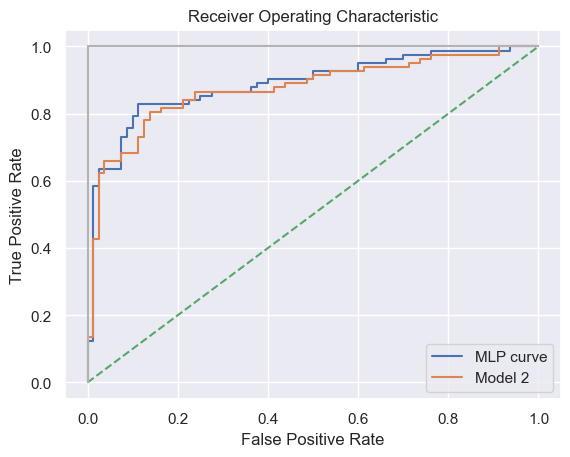

In [507]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# # Create feature matrix and target vector
# features, target = make_classification(n_samples=10000,
#                                        n_features=10,
#                                        n_classes=2,
#                                        n_informative=3,
#                                        random_state=3)

# # Split into training and test sets
# features_train, features_test, target_train, target_test = train_test_split(
#     features, target, test_size=0.1, random_state=1)

# # Create classifier
# logit = LogisticRegression()

# # Train model
# logit.fit(features_train, target_train)

# # Get predicted probabilities
# target_probabilities = logit.predict_proba(features_test)[:,1]

# Create true and false positive rates
false_positive_rate_mlp, true_positive_rate_mlp, threshold = roc_curve(y_test,
                                                               yhat_proba_mlp)

false_positive_rate_2, true_positive_rate_2, threshold = roc_curve(y_test,
                                                               yhat_proba_2)


# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate_mlp, true_positive_rate_mlp, label='MLP curve')
plt.plot(false_positive_rate_2, true_positive_rate_2, label='Model 2')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

The resulting ROC curve is increadibly close which aligns with the analysis to show that there is little to no statistical difference in these models. If I had to pick, my MLP only model slightly outperforms as the area under the curve is larger, though it appears very slight. 

#### Takeaways

This was an interesting dataset to analyze and try to understnad how well we could predict the result. At roughly an 80 to 84% F1 score I'm not confident I would deploy this model for use. While it could be a guiding point in discussions on patient outcome, it contains enough error that I would be hesitant to rely on it as a predictor of outcomes. A further exploration of some of the genomic features may be warranted to see if they would lend additional insight into this analysis.